In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

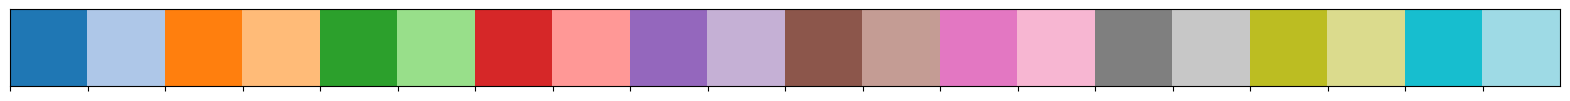

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("tab20", 20)
sns.palplot(palette)
plt.show()


Lecutra data resultados

In [266]:
df_alumnes = pd.read_csv('data/data_aprobados_colegio_barrio_2022.csv',delimiter =";", encoding='latin-1')
df_alumnes.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6


Filtrado solo Barcelona

In [267]:
df_alumnes_bcn = df_alumnes[df_alumnes['Municipi']=="BARCELONA"]
df_alumnes_bcn.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6


Filtrado coles públicos y limpieza columnas importantes

In [272]:
df_alumnes_bcn_public = df_alumnes_bcn[df_alumnes_bcn["Naturalesa"]=="PÚBLIC"]
df_resultats_public = df_alumnes_bcn_public[["Sexe","Resultat de l'avaluació","Codi districte","Alumnes avaluats"]]
total_avaluats_public = df_resultats_public["Alumnes avaluats"].sum()
total_avaluats_public

22280

Distinción sin pendientes, con pendientes y que no pasan de curso

In [294]:
sense_pendentes = df_resultats_public[df_resultats_public["Resultat de l'avaluació"]=="PROMOCIONEN SENSE PENDENTS"]
amb_pendentes =  df_resultats_public[df_resultats_public["Resultat de l'avaluació"]=="PROMOCIONEN AMB PENDENTS"]
no_prom =  df_resultats_public[df_resultats_public["Resultat de l'avaluació"]=="NO PROMOCIONEN"]

Distinción en género

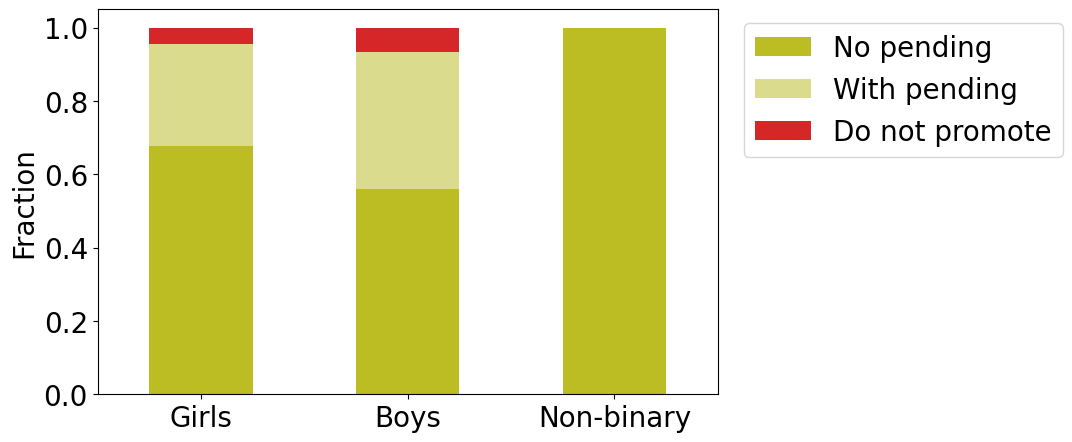

In [295]:
sense_pendentes = sense_pendentes.groupby("Sexe")["Alumnes avaluats"].sum()
amb_pendentes = amb_pendentes.groupby("Sexe")["Alumnes avaluats"].sum()
no_prom = no_prom.groupby("Sexe")["Alumnes avaluats"].sum()


# Crear un DataFrame combinando las tres Series
df_graf = pd.DataFrame({
    "Sense pendents": sense_pendentes,
    "Amb pendents": amb_pendentes,
    "No promocionen": no_prom
})


df_frac = df_graf.div(df_graf.sum(axis=1),axis=0)

df_frac = df_frac.rename(index={"DONA":"Girls","HOME":"Boys","NINF":"Non-binary"})
df_frac = df_frac.rename(columns={
    "Sense pendents": "No pending",
    "Amb pendents": "With pending",
    "No promocionen": "Do not promote"
})
# Graficar barras apiladas
df_frac.plot(kind='bar', stacked=True, color=[palette[16], palette[17],palette[6]], figsize=(8,5))


plt.ylabel("Fraction",fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.xticks(rotation=0,fontsize=20)
plt.legend( bbox_to_anchor=(1.02,1),fontsize=20)
plt.savefig("figures_julia/barplot_sexe_resultat_public.png",bbox_inches='tight',dpi=300)
plt.show()


In [ ]:
df_sex = df_alumnes_bcn_public[["Sexe","Alumnes avaluats"]]
df_sex

,Sexe,Alumnes avaluats
41,DONA,42
42,DONA,101
43,HOME,4
44,HOME,68
45,HOME,95
...,...,...
1182,DONA,143
1183,DONA,350
1184,HOME,88
1185,HOME,167


In [200]:
df_sex_sum = df_sex.groupby("Sexe")["Alumnes avaluats"].sum()
percent = df_sex_sum / df_sex_sum.sum()*100

# Diccionario de traducción
translate = {
    "HOME": "Boys",
    "DONA": "Girls",
    "NINF": "Not reported",
    "Altres": "Others"
}

# Gráfico sin etiquetas en el pie
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    labels=None,            # ❗ quitamos las etiquetas dentro
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(sizes)]
)

# Agregar la leyenda
plt.legend(
    wedges,
    labels,
    fontsize=13,
    loc="upper right",
    bbox_to_anchor=(1.3, 1)
)

# Cambiar el tamaño del porcentaje
for autotext in autotexts:
    autotext.set_fontsize(15)     # << CAMBIA AQUÍ EL TAMAÑO
    autotext.set_color("black")   # opcional

plt.title('% Pupils Depending on Sex',fontsize=18)
plt.axis('equal')
plt.show()


NameError: name 'colors' is not defined

<Figure size 600x600 with 0 Axes>

## NECESITIES ESPECIALS/ESPECÍFICS

In [214]:
df_alumnes_necessities = pd.read_csv('data_Julia/special_necesities_21_22.csv',delimiter =";")
df_alumnes_necessities.head()

,Curs,Estudis,Codi àrea territorial,Àrea territorial,Naturalesa,Titularitat,Matrícula concertada (S/N),Sexe,NESE agrupació,NESE descripció,Alumnes matriculats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRANSTORN GREU DE LA CONDUCTA,4
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRASTORN MENTAL GREU,8
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRASTORNS DE L'ESPECTRE AUTISTA,4
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIFIQUES,ALTES CAPACITATS,13
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIFIQUES,ALUMNAT NOUVINGUT,21


In [215]:
df_alumnes_necessities["NESE agrupació"].unique()

array(['NECESSITATS EDUCATIVES ESPECIALS',
       'NECESSITATS EDUCATIVES ESPECIFIQUES'], dtype=object)

In [216]:
df_alumnes_necessities_public = df_alumnes_necessities[df_alumnes_necessities["Naturalesa"]=="PÚBLIC"]
df_alumnes_necessities_public_sum = df_alumnes_necessities_public["Alumnes matriculats"].sum()
df_alumnes_necessities_public_sum

55264

In [217]:
df_alumnes_necessities_public.head()

,Curs,Estudis,Codi àrea territorial,Àrea territorial,Naturalesa,Titularitat,Matrícula concertada (S/N),Sexe,NESE agrupació,NESE descripció,Alumnes matriculats
54,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA LLEUGERA,1
55,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA MITJANA,1
56,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA PROFUNDA,3
57,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA SEVERA,1
58,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT INTEL·LECTUAL LLEUGERA,4


NO TODOS LOS MATRICULADOS SE EVALUAN (ESPECIALMENTE EN ESTA CATEGORIA)

In [218]:
df_alumnes_necessities_public = df_alumnes_necessities_public.drop(columns =["Curs","Estudis","Codi àrea territorial","Àrea territorial","Naturalesa","Titularitat","Matrícula concertada (S/N)"])
df_alumnes_necessities_public.head()

,Sexe,NESE agrupació,NESE descripció,Alumnes matriculats
54,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA LLEUGERA,1
55,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA MITJANA,1
56,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA PROFUNDA,3
57,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA SEVERA,1
58,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT INTEL·LECTUAL LLEUGERA,4


Distinción tipos de necesidades

In [219]:
# Trabajan lo mismo pero de otra forma

especifiques = [
    'ALTES CAPACITATS', 'ALUMNAT NOUVINGUT',
    "RETARD GREU DE L'APRENENTATGE",
    "TRANSTORNS QUE CONDICIONEN L'APRENENTATGE",
    'SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS DESAFAVORIDES'
]

## Requieren cambiar el CV del alumno
especials = [
    'TRANSTORN GREU DE LA CONDUCTA', 'TRASTORN MENTAL GREU',
    "TRASTORNS DE L'ESPECTRE AUTISTA",
    'DISCAPACITAT INTEL·LECTUAL LLEUGERA',
    'DISCAPACITAT AUDITIVA LLEUGERA', 'DISCAPACITAT AUDITIVA MITJANA',
    'DISCAPACITAT AUDITIVA PROFUNDA', 'DISCAPACITAT AUDITIVA SEVERA',
    'DISCAPACITAT INTEL·LECTUAL MODERADA',
    'DISCAPACITAT MOTRIU AUTÒNOM', 'DISCAPACITAT MOTRIU DEPENENT',
    'DISCAPACITAT MOTRIU SEMIAUTÒNOM', 'DISCAPACITAT VISUAL',
    'PLURIDISCAPACITAT',
    'RETARD DEL DESENVOLUPAMENT SENSE ETIOLOGIA CLARA',
    'DISCAPACITAT INTEL·LECTUAL SEVERA',
    'DISCAPACITAT INTEL·LECTUAL PROFUNDA'
]

educatives = [
    'ALTES CAPACITATS',
    'ALUMNAT NOUVINGUT',
    "RETARD GREU DE L'APRENENTATGE",
    "TRANSTORNS QUE CONDICIONEN L'APRENENTATGE",
    'SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS DESAFAVORIDES'
]

intel = [
    'DISCAPACITAT INTEL·LECTUAL LLEUGERA',
    'DISCAPACITAT INTEL·LECTUAL MODERADA',
    'DISCAPACITAT INTEL·LECTUAL SEVERA',
    'DISCAPACITAT INTEL·LECTUAL PROFUNDA',
    'RETARD DEL DESENVOLUPAMENT SENSE ETIOLOGIA CLARA'
]

mental = [
    'TRANSTORN GREU DE LA CONDUCTA',
    "TRASTORNS DE L'ESPECTRE AUTISTA",
    'TRASTORN MENTAL GREU'
]

fisics = [
    'DISCAPACITAT AUDITIVA LLEUGERA',
    'DISCAPACITAT AUDITIVA MITJANA',
    'DISCAPACITAT AUDITIVA SEVERA',
    'DISCAPACITAT AUDITIVA PROFUNDA',
    'DISCAPACITAT VISUAL',
    'DISCAPACITAT MOTRIU AUTÒNOM',
    'DISCAPACITAT MOTRIU SEMIAUTÒNOM',
    'DISCAPACITAT MOTRIU DEPENENT',
    'PLURIDISCAPACITAT'
]



In [ ]:
# Alumnos con necesidades educativas específiques
df_especifiques = df_alumnes_necessities_public[
    df_alumnes_necessities_public["NESE descripció"].isin(especifiques)
]

# Alumnos con necesidades educativas especials
df_especials = df_alumnes_necessities_public[
    df_alumnes_necessities_public["NESE descripció"].isin(especials)
]

df_mental = df_alumnes_necessities_public[df_alumnes_necessities_public["NESE descripció"].isin(mental)]

df_educatives = df_alumnes_necessities_public[df_alumnes_necessities_public["NESE descripció"].isin(educatives)]

df_intel = df_alumnes_necessities_public[df_alumnes_necessities_public["NESE descripció"].isin(intel)]

df_fisics = df_alumnes_necessities_public[df_alumnes_necessities_public["NESE descripció"].isin(fisics)]

55264

In [230]:
df_mental_sum = df_mental["Alumnes matriculats"].sum()
df_intel_sum = df_intel["Alumnes matriculats"].sum()
df_fisics_sum = df_fisics["Alumnes matriculats"].sum()
df_educatives_sum = df_educatives["Alumnes matriculats"].sum()
print(df_mental_sum, df_intel_sum, df_fisics_sum, df_educatives_sum)

4044 3879 880 46461


In [221]:
conteo = df_alumnes_necessities.groupby("NESE descripció")["Alumnes matriculats"].sum().sort_values(ascending=False)
conteo

NESE descripció
SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS DESAFAVORIDES    26894
TRANSTORNS QUE CONDICIONEN L'APRENENTATGE                       25149
ALUMNAT NOUVINGUT                                               10797
TRASTORNS DE L'ESPECTRE AUTISTA                                  4148
DISCAPACITAT INTEL·LECTUAL LLEUGERA                              3836
RETARD GREU DE L'APRENENTATGE                                    3465
ALTES CAPACITATS                                                 2020
TRANSTORN GREU DE LA CONDUCTA                                    1527
DISCAPACITAT INTEL·LECTUAL MODERADA                               695
RETARD DEL DESENVOLUPAMENT SENSE ETIOLOGIA CLARA                  355
DISCAPACITAT MOTRIU AUTÒNOM                                       258
DISCAPACITAT VISUAL                                               217
DISCAPACITAT AUDITIVA MITJANA                                     216
TRASTORN MENTAL GREU                                              149
DISC

C:\Users\PC\AppData\Local\Temp\ipykernel_18784\3216170699.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




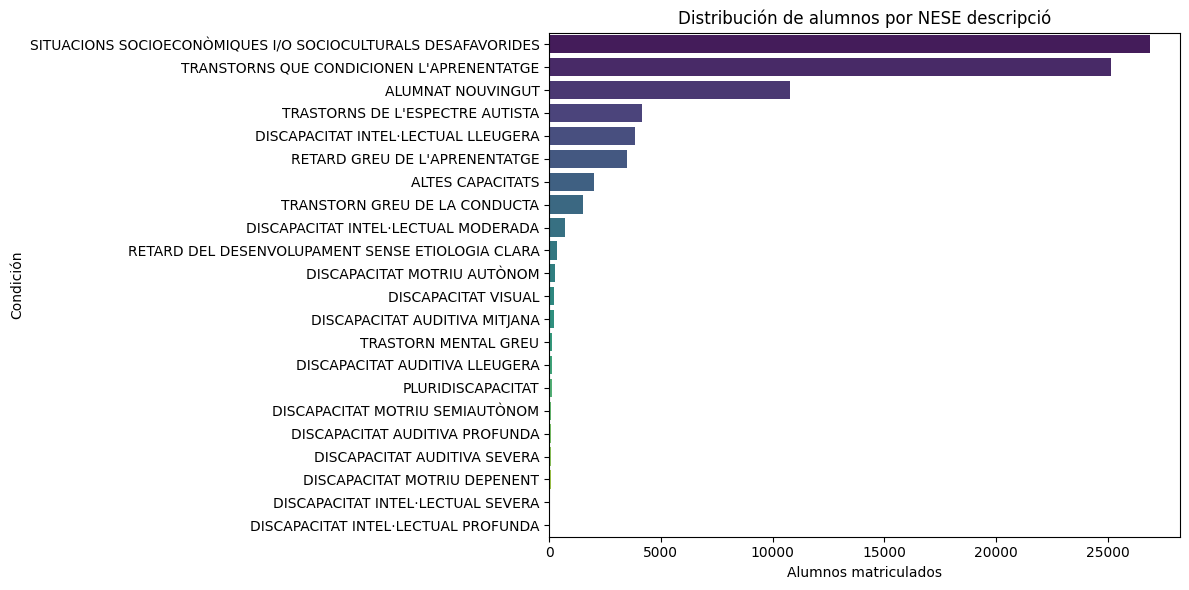

In [222]:
import seaborn as sns

# Convertimos a DataFrame para seaborn
df_plot = conteo.reset_index()
df_plot.columns = ["NESE descripció", "Alumnes matriculats"]

plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, y="NESE descripció", x="Alumnes matriculats", palette="viridis")
plt.title("Distribución de alumnos por NESE descripció")
plt.xlabel("Alumnos matriculados")
plt.ylabel("Condición")
plt.tight_layout()
plt.show()


Primeras filas del DataFrame:
    Sexe                    NESE agrupació  \
54  DONA  NECESSITATS EDUCATIVES ESPECIALS   
55  DONA  NECESSITATS EDUCATIVES ESPECIALS   
56  DONA  NECESSITATS EDUCATIVES ESPECIALS   
57  DONA  NECESSITATS EDUCATIVES ESPECIALS   
58  DONA  NECESSITATS EDUCATIVES ESPECIALS   

                        NESE descripció  Alumnes matriculats  
54       DISCAPACITAT AUDITIVA LLEUGERA                    1  
55        DISCAPACITAT AUDITIVA MITJANA                    1  
56       DISCAPACITAT AUDITIVA PROFUNDA                    3  
57         DISCAPACITAT AUDITIVA SEVERA                    1  
58  DISCAPACITAT INTEL·LECTUAL LLEUGERA                    4  

Valores únicos en la columna 'Sexe':
['DONA' 'HOME']

Valores únicos en la columna 'NESE descripció':
['DISCAPACITAT AUDITIVA LLEUGERA' 'DISCAPACITAT AUDITIVA MITJANA'
 'DISCAPACITAT AUDITIVA PROFUNDA' 'DISCAPACITAT AUDITIVA SEVERA'
 'DISCAPACITAT INTEL·LECTUAL LLEUGERA'
 'DISCAPACITAT INTEL·LECTUAL MODERADA' 'DI

C:\Users\PC\AppData\Local\Temp\ipykernel_18784\2281269466.py:113: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




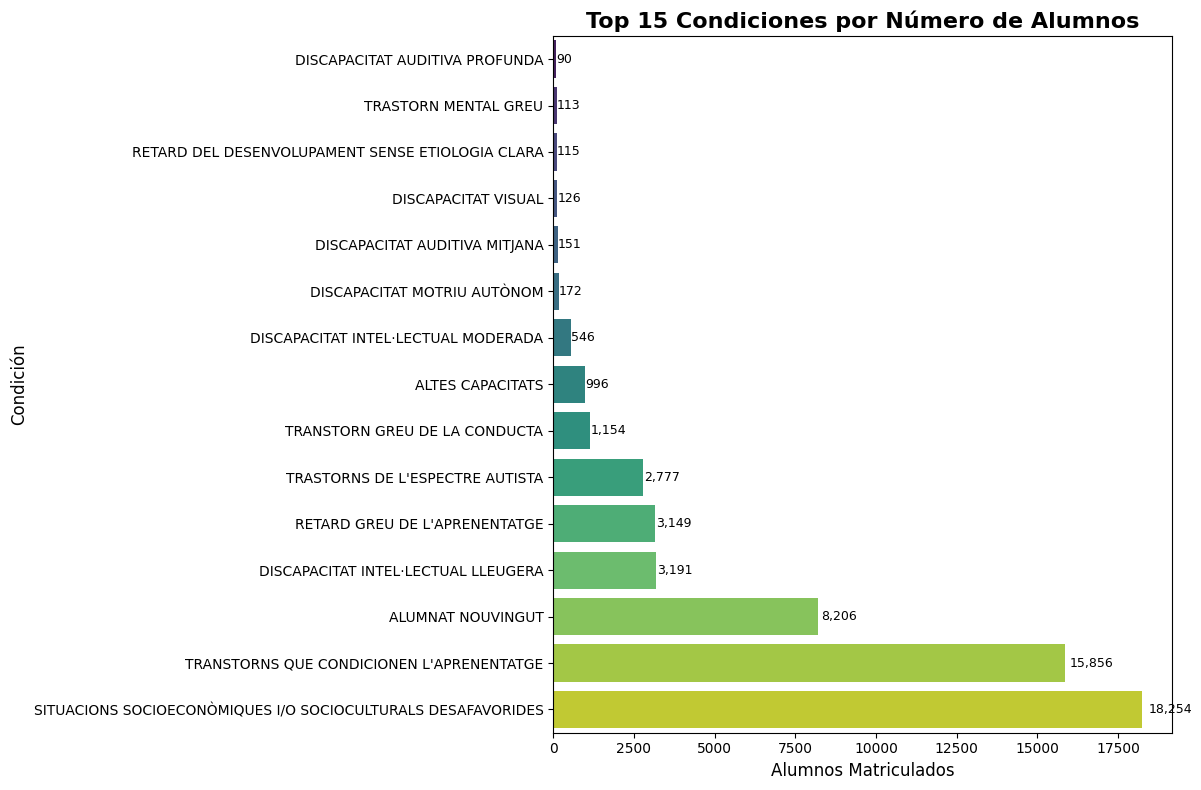

<Figure size 1400x1000 with 0 Axes>

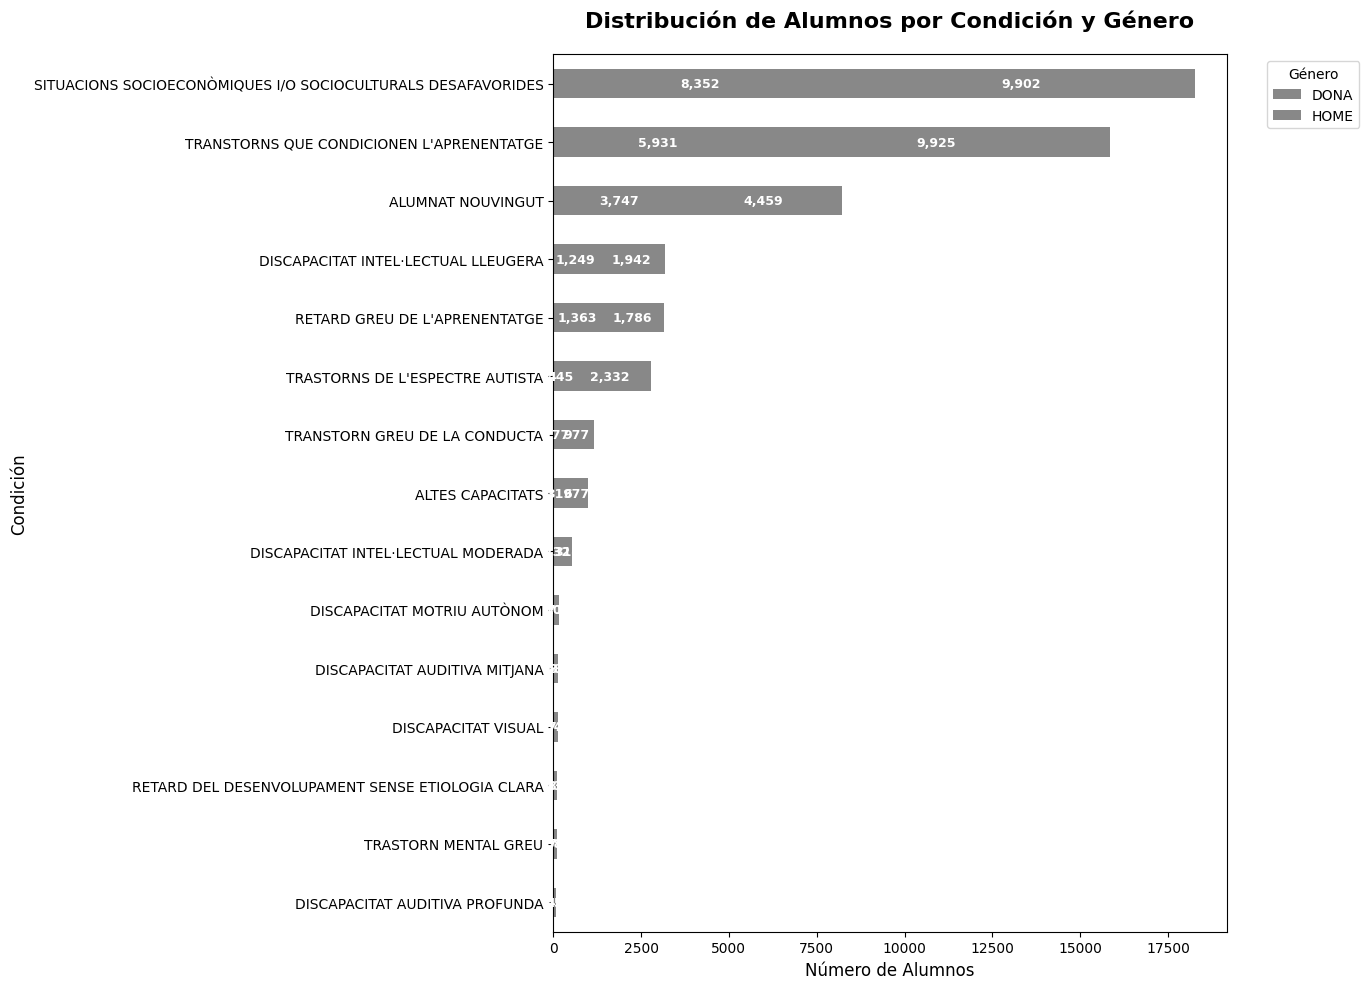

<Figure size 1400x1000 with 0 Axes>

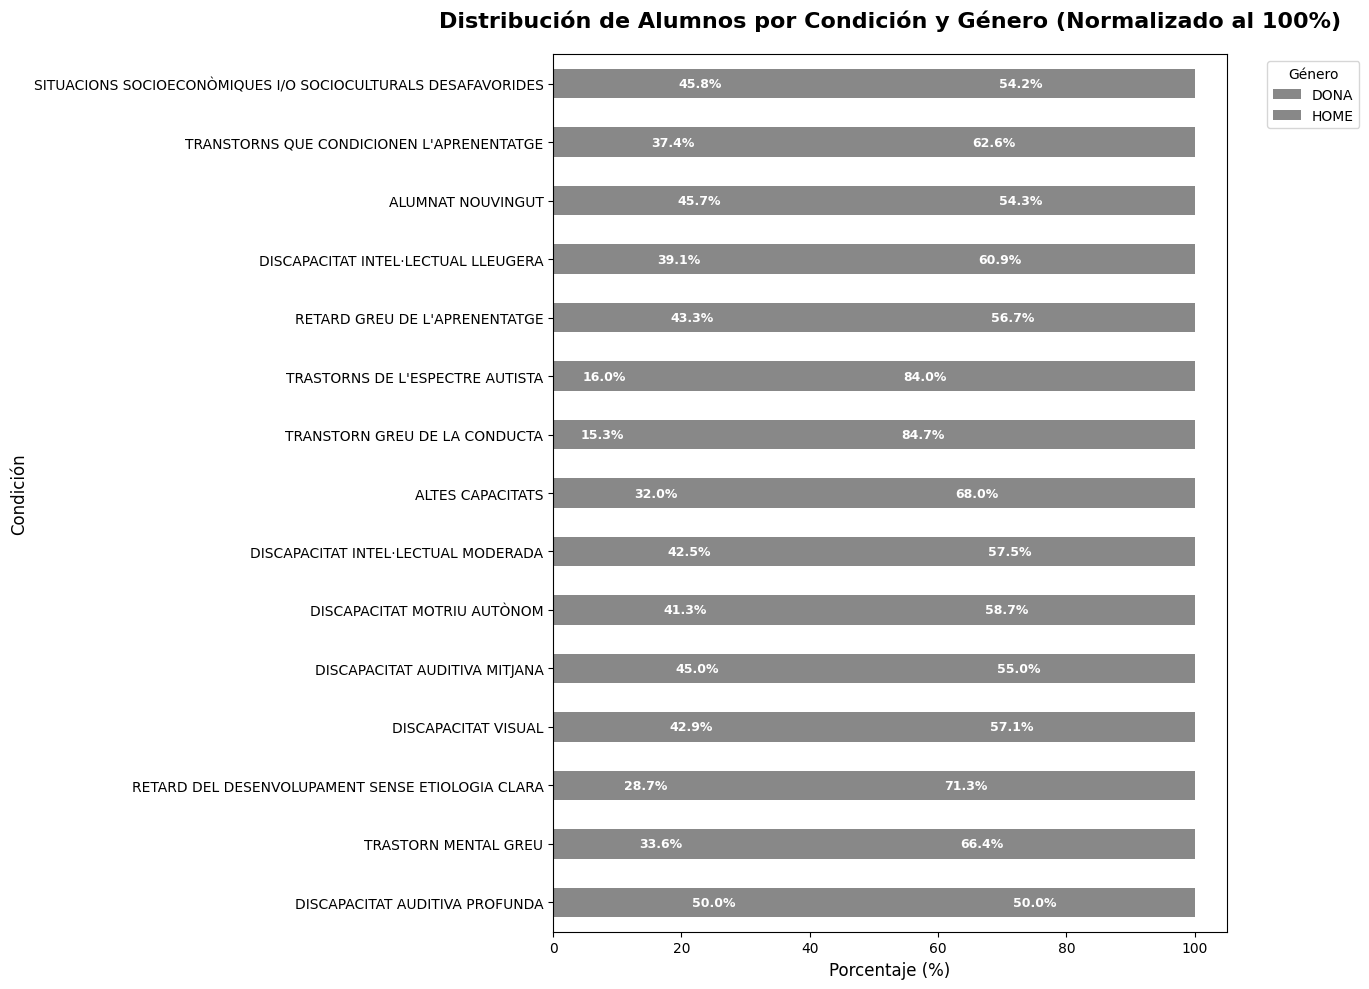


Datos para gráfico apilado (top 15 condiciones):
Sexe                                                DONA  HOME
NESE descripció                                               
DISCAPACITAT AUDITIVA PROFUNDA                        45    45
TRASTORN MENTAL GREU                                  38    75
RETARD DEL DESENVOLUPAMENT SENSE ETIOLOGIA CLARA      33    82
DISCAPACITAT VISUAL                                   54    72
DISCAPACITAT AUDITIVA MITJANA                         68    83
DISCAPACITAT MOTRIU AUTÒNOM                           71   101
DISCAPACITAT INTEL·LECTUAL MODERADA                  232   314
ALTES CAPACITATS                                     319   677
TRANSTORN GREU DE LA CONDUCTA                        177   977
TRASTORNS DE L'ESPECTRE AUTISTA                      445  2332
RETARD GREU DE L'APRENENTATGE                       1363  1786
DISCAPACITAT INTEL·LECTUAL LLEUGERA                 1249  1942
ALUMNAT NOUVINGUT                                   3747  4459
TRANS

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def crear_grafico_barras_apiladas(df, top_n=15):
    """
    Crea un gráfico de barras horizontales apiladas por género
    para las top_n condiciones más comunes
    """
    # Agrupar por condición y género
    df_agrupado = df.groupby(['NESE descripció', 'Sexe'])['Alumnes matriculats'].sum().reset_index()
    
    # Pivotar para tener género como columnas
    df_pivot = df_agrupado.pivot(index='NESE descripció', 
                                columns='Sexe', 
                                values='Alumnes matriculats').fillna(0)
    
    # Ordenar por total (suma de ambos géneros) y tomar los top_n
    df_pivot['Total'] = df_pivot.sum(axis=1)
    df_pivot = df_pivot.sort_values('Total', ascending=True).tail(top_n)
    df_pivot = df_pivot.drop('Total', axis=1)
    
    # Crear el gráfico
    plt.figure(figsize=(14, 10))
    
    # Colores para géneros (ajusta según los valores en tu columna 'Sexe')
    colores = {'Home': '#1f77b4', 'Dona': '#ff7f0e'}  # Azul para hombre, naranja para mujer
    
    # Crear barras apiladas
    ax = df_pivot.plot(kind='barh', 
                      stacked=True, 
                      color=[colores.get(col, '#888888') for col in df_pivot.columns],
                      figsize=(14, 10))
    
    plt.title('Distribución de Alumnos por Condición y Género', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Número de Alumnos', fontsize=12)
    plt.ylabel('Condición', fontsize=12)
    
    # Añadir valores en las barras
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{x:,.0f}' if x > 0 else '' for x in container.datavalues],
                    label_type='center', fontsize=9, color='white', fontweight='bold')
    
    # Leyenda
    plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf(), df_pivot

def crear_grafico_barras_normalizado(df, top_n=15):
    """
    Crea un gráfico de barras horizontales normalizado al 100%
    para las top_n condiciones más comunes
    """
    # Agrupar por condición y género
    df_agrupado = df.groupby(['NESE descripció', 'Sexe'])['Alumnes matriculats'].sum().reset_index()
    
    # Pivotar para tener género como columnas
    df_pivot = df_agrupado.pivot(index='NESE descripció', 
                                columns='Sexe', 
                                values='Alumnes matriculats').fillna(0)
    
    # Ordenar por total y tomar los top_n
    df_pivot['Total'] = df_pivot.sum(axis=1)
    df_pivot = df_pivot.sort_values('Total', ascending=True).tail(top_n)
    df_pivot = df_pivot.drop('Total', axis=1)
    
    # Normalizar al 100% por fila
    df_normalizado = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100
    
    # Crear el gráfico
    plt.figure(figsize=(14, 10))
    
    # Colores para géneros
    colores = {'Home': '#1f77b4', 'Dona': '#ff7f0e'}
    
    # Crear barras apiladas normalizadas
    ax = df_normalizado.plot(kind='barh', 
                           stacked=True, 
                           color=[colores.get(col, '#888888') for col in df_normalizado.columns],
                           figsize=(14, 10))
    
    plt.title('Distribución de Alumnos por Condición y Género (Normalizado al 100%)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Porcentaje (%)', fontsize=12)
    plt.ylabel('Condición', fontsize=12)
    
    # Añadir porcentajes en las barras
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{x:.1f}%' if x > 5 else '' for x in container.datavalues],
                    label_type='center', fontsize=9, color='white', fontweight='bold')
    
    # Leyenda
    plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf(), df_normalizado

def crear_grafico_simple_por_condicion(df, top_n=15):
    """
    Crea un gráfico simple por condición (sin género) como el que tenías
    pero mejorado
    """
    # Agrupar por condición
    df_agrupado = df.groupby('NESE descripció')['Alumnes matriculats'].sum().reset_index()
    
    # Ordenar y tomar top_n
    df_agrupado = df_agrupado.sort_values('Alumnes matriculats', ascending=True).tail(top_n)
    
    # Crear gráfico
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_agrupado, y='NESE descripció', x='Alumnes matriculats', palette='viridis')
    plt.title(f'Top {top_n} Condiciones por Número de Alumnos', fontsize=16, fontweight='bold')
    plt.xlabel('Alumnos Matriculados', fontsize=12)
    plt.ylabel('Condición', fontsize=12)
    
    # Añadir valores en las barras
    for i, v in enumerate(df_agrupado['Alumnes matriculats']):
        plt.text(v + v * 0.01, i, f'{v:,.0f}', va='center', fontsize=9)
    
    plt.tight_layout()
    return plt.gcf()

# VERIFICAR LOS DATOS
print("Primeras filas del DataFrame:")
print(df_alumnes_necessities_public.head())

print("\nValores únicos en la columna 'Sexe':")
print(df_alumnes_necessities_public['Sexe'].unique())

print("\nValores únicos en la columna 'NESE descripció':")
print(df_alumnes_necessities_public['NESE descripció'].unique()[:10])  # Primeros 10

# CREAR LOS GRÁFICOS
print("\nCreando gráficos...")

# 1. Gráfico simple por condición (como el que tenías)
fig1 = crear_grafico_simple_por_condicion(df_alumnes_necessities_public, top_n=15)
plt.show()

# 2. Gráfico con género (valores absolutos)
fig2, datos_absolutos = crear_grafico_barras_apiladas(df_alumnes_necessities_public, top_n=15)
plt.show()

# 3. Gráfico con género (normalizado)
fig3, datos_normalizados = crear_grafico_barras_normalizado(df_alumnes_necessities_public, top_n=15)
plt.show()

# Mostrar los datos utilizados
print("\nDatos para gráfico apilado (top 15 condiciones):")
print(datos_absolutos)

print("\nDatos normalizados (top 15 condiciones):")
print(datos_normalizados)

Distribucion necesidades por género incluido

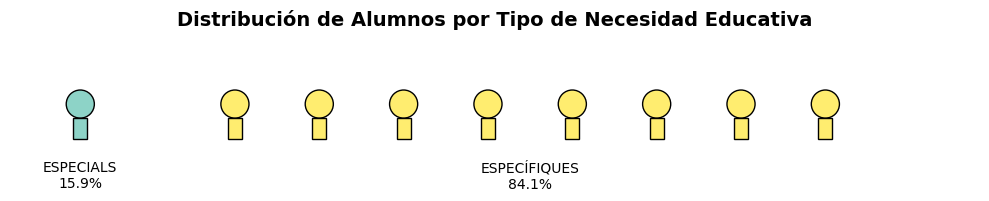

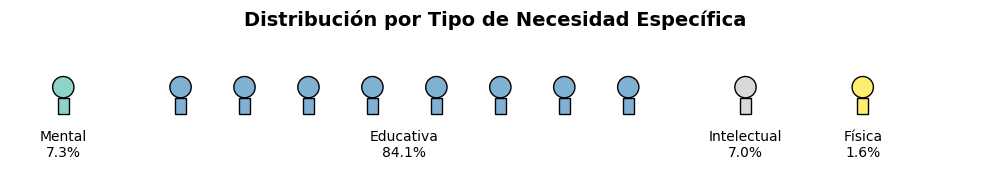

In [244]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

def crear_grafico_monigotes_matplotlib(datos, titulo):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    total = sum(datos.values())
    colores = plt.cm.Set3(np.linspace(0, 1, len(datos)))
    
    x_pos = 0
    for (categoria, valor), color in zip(datos.items(), colores):
        porcentaje = (valor / total) * 100
        num_monigotes = max(1, int(porcentaje / 10))  # 1 monigote por cada 10%
        
        # Dibujar monigotes simples
        for i in range(num_monigotes):
            # Cabeza
            cabeza = patches.Circle((x_pos + i * 1.2, 0), 0.2, 
                                  facecolor=color, edgecolor='black')
            # Cuerpo
            cuerpo = patches.Rectangle((x_pos + i * 1.2 - 0.1, -0.5), 0.2, 0.3,
                                     facecolor=color, edgecolor='black')
            ax.add_patch(cabeza)
            ax.add_patch(cuerpo)
        
        # Añadir etiqueta
        ax.text(x_pos + (num_monigotes - 1) * 0.6, -0.8, 
               f'{categoria}\n{porcentaje:.1f}%', 
               ha='center', va='top', fontsize=10)
        
        x_pos += num_monigotes * 1.2 + 1
    
    ax.set_xlim(-1, x_pos)
    ax.set_ylim(-1, 1)
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_aspect('equal')
    ax.axis('off')
    
    plt.tight_layout()
    return fig

# Gráfico principal
datos_principal = {
    'ESPECIALS': df_especials['Alumnes matriculats'].sum(),
    'ESPECÍFIQUES': df_especifiques['Alumnes matriculats'].sum()
}

fig1 = crear_grafico_monigotes_matplotlib(datos_principal, 
                                        'Distribución de Alumnos por Tipo de Necesidad Educativa')
plt.show()

# Gráfico de subgrupos
datos_subgrupos = {
    'Mental': df_mental['Alumnes matriculats'].sum(),
    'Educativa': df_educatives['Alumnes matriculats'].sum(),
    'Intelectual': df_intel['Alumnes matriculats'].sum(),
    'Física': df_fisics['Alumnes matriculats'].sum()
}

fig2 = crear_grafico_monigotes_matplotlib(datos_subgrupos, 
                                        'Distribución por Tipo de Necesidad Específica')
plt.show()

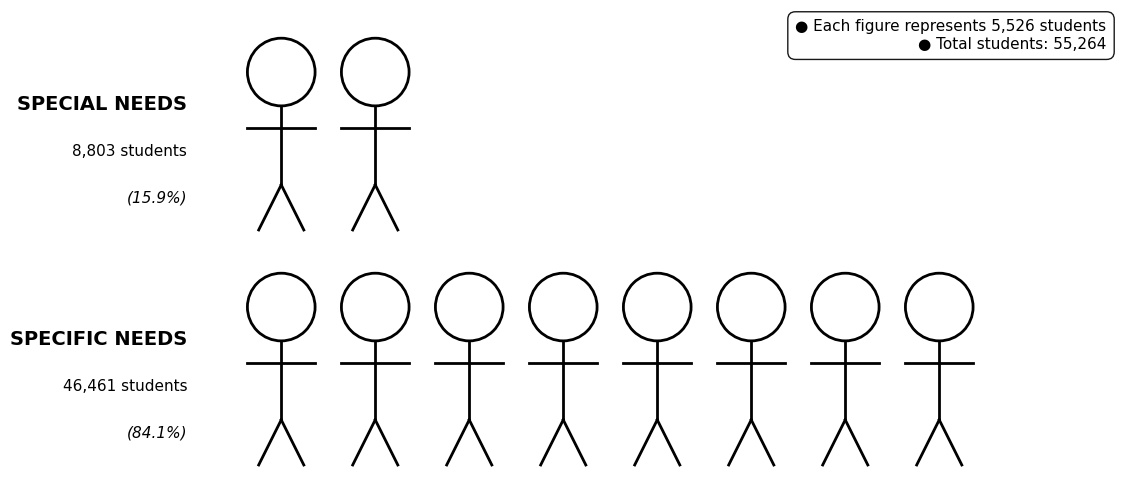

In [258]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def dibujar_persona(ax, x, y, tamaño=1.0, color_body='#1f77b4'):
    """Dibuja una figura humana simple con cabeza negra"""
    scale = tamaño
    
    # Cabeza negra
    cabeza = Circle((x, y + 0.7 * scale), 0.3 * scale, 
                    facecolor='none', edgecolor='black', linewidth=2)
    ax.add_patch(cabeza)
    
    # Cuerpo, brazos y piernas en color_body
    ax.plot([x, x], [y + 0.4 * scale, y - 0.3 * scale], color=color_body, linewidth=2)
    ax.plot([x - 0.3 * scale, x + 0.3 * scale], [y + 0.2 * scale, y + 0.2 * scale], color=color_body, linewidth=2)
    ax.plot([x, x - 0.2 * scale], [y - 0.3 * scale, y - 0.7 * scale], color=color_body, linewidth=2)
    ax.plot([x, x + 0.2 * scale], [y - 0.3 * scale, y - 0.7 * scale], color=color_body, linewidth=2)

def crear_pictogram_simple(datos, titulo, total_iconos=10, iconos_por_fila=10):
    """Pictograma simple solo con dos categorías"""
    fig, ax = plt.subplots(figsize=(12, 5))
    
    total = sum(datos.values())
    categorias = list(datos.keys())
    valores = list(datos.values())
    porcentajes = [(v / total) * 100 for v in valores]
    
    # Colores para el cuerpo de las figuras
    colores = ["black","black"]
    
    # Iconos por categoría
    iconos_por_categoria = [max(1, round((v / total) * total_iconos)) for v in valores]
    
    # Posiciones verticales
    y_positions = [2.5, 0]
    
    for i, (categoria, valor, porcentaje, color, num_iconos) in enumerate(
        zip(categorias, valores, porcentajes, colores, iconos_por_categoria)):
        
        y = y_positions[i]
        # Etiquetas en inglés
        ax.text(-1, y + 0.5, f'{categoria}', ha='right', va='center', fontsize=14, fontweight='bold')
        ax.text(-1, y, f'{valor:,} students', ha='right', va='center', fontsize=11)
        ax.text(-1, y - 0.5, f'({porcentaje:.1f}%)', ha='right', va='center', fontsize=11, style='italic')
        
        # Dibujar iconos
        for j in range(num_iconos):
            x_pos = j * 1.0
            dibujar_persona(ax, x_pos, y, tamaño=1.2, color_body=color)
    
    ax.set_xlim(-2, max(iconos_por_categoria) * 1.0 + 1)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')
    ax.axis('off')

    
    # Leyenda arriba a la derecha
    ax.text(0.98, 0.98, 
            f'● Each figure represents {total / total_iconos:,.0f} students\n● Total students: {total:,}',
            transform=ax.transAxes, fontsize=11, va='top', ha='right',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9))
    
    plt.tight_layout()
    return fig

# EJEMPLO DE USO
# Suponiendo que estos son tus datos
df_especials = {'Alumnes matriculats': 8803}
df_especifiques = {'Alumnes matriculats': 46461}

datos_principal = {
    'SPECIAL NEEDS': df_especials['Alumnes matriculats'],
    'SPECIFIC NEEDS': df_especifiques['Alumnes matriculats']
}

fig = crear_pictogram_simple(datos_principal, 'STUDENT DISTRIBUTION BY NEED TYPE', total_iconos=10)
plt.show()


In [180]:
df_necesities = df_alumnes_necessities[["Naturalesa", "Sexe", "NESE descripció", "Alumnes matriculats"]].copy()
df_necesities

,Naturalesa,Sexe,NESE descripció,Alumnes matriculats
0,PRIVAT,DONA,TRANSTORN GREU DE LA CONDUCTA,4
1,PRIVAT,DONA,TRASTORN MENTAL GREU,8
2,PRIVAT,DONA,TRASTORNS DE L'ESPECTRE AUTISTA,4
3,PRIVAT,DONA,ALTES CAPACITATS,13
4,PRIVAT,DONA,ALUMNAT NOUVINGUT,21
...,...,...,...,...
843,PÚBLIC,HOME,ALTES CAPACITATS,36
844,PÚBLIC,HOME,ALUMNAT NOUVINGUT,361
845,PÚBLIC,HOME,RETARD GREU DE L'APRENENTATGE,131
846,PÚBLIC,HOME,SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS...,964


In [10]:
import pandas as pd
df_results = pd.read_csv('data/data_aprobados_colegio_barrio_2022.csv',delimiter =";",encoding='latin1')
print(df_results.columns)

Index(['Curs', 'Estudi', 'Codi àrea territorial', 'Àrea territorial',
       'Codi comarca', 'Comarca', 'Codi municipi', 'Municipi',
       'Codi districte', 'Naturalesa', 'Titularitat', 'Nivell', 'Sexe',
       'Concert', 'Resultat de l'avaluació', 'Alumnes avaluats'],
      dtype='object')


In [29]:
df_results = df_results[df_results["Municipi"]=="BARCELONA"]
df_results.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6


In [33]:
columnas_utiles = [
    'Codi districte',
    'Naturalesa',
    'Sexe',
    "Resultat de l'avaluació",
    'Alumnes avaluats'
]

df_results = df_results[columnas_utiles].copy()
df_results

,Codi districte,Naturalesa,Sexe,Resultat de l'avaluació,Alumnes avaluats
0,801901,PRIVAT,DONA,PROMOCIONEN SENSE PENDENTS,17
1,801901,PRIVAT,HOME,PROMOCIONEN AMB PENDENTS,5
2,801901,PRIVAT,HOME,PROMOCIONEN SENSE PENDENTS,38
3,801901,PRIVAT,DONA,NO PROMOCIONEN,1
4,801901,PRIVAT,DONA,PROMOCIONEN AMB PENDENTS,6
...,...,...,...,...,...
1182,801910,PÚBLIC,DONA,PROMOCIONEN AMB PENDENTS,143
1183,801910,PÚBLIC,DONA,PROMOCIONEN SENSE PENDENTS,350
1184,801910,PÚBLIC,HOME,NO PROMOCIONEN,88
1185,801910,PÚBLIC,HOME,PROMOCIONEN AMB PENDENTS,167


In [2]:
import pandas as pd

# Leer el CSV
df_caract = pd.read_csv('data_Julia/nationality_special_necesities_21_22.csv', delimiter=';')

# Filtrar solo filas donde el municipi sea "BARCELONA"
# Usamos str.upper() por si hay diferencias de mayúsculas/minúsculas
df_caracteristics = df_caract[df_caract["Municipi"].str.upper() == "BARCELONA"].copy()

# Seleccionar solo las columnas relevantes para análisis
columnas_utiles = [
    'Naturalesa',
    'Titularitat',
    'Nivell',
    'Codi districte',
    'Matrícula concertada (S/N)',
    'Sexe',
    'Edat',
    'Zona nacionalitat (agrupació)',
    'Necessitats específiques de suport educatiu',
    'Alumnes matriculats'
]

df_caracteristics = df_caracteristics[columnas_utiles].copy()

# Revisar el resultado
df_caracteristics


,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats
0,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,CENTRE I SUDAMÈRICA,SI,1
1,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,NO,1
2,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,SI,1
3,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,MAGREB,SI,1
4,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ÀSIA I OCEANIA,SI,1
...,...,...,...,...,...,...,...,...,...,...
5250,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,CENTRE I SUDAMÈRICA,SI,1
5251,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,NO,3
5252,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,SI,6
5253,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,MAGREB,NO,1


Cambio de codigo de distrito a barrio

In [34]:
import pandas as pd
import geopandas as gpd

# 1) Cargar GeoJSON
gdf_barrios = gpd.read_file("barcelona_barris_clean.geojson")

# 2) Normalizar nombres
gdf_barrios.columns = gdf_barrios.columns.str.lower().str.replace(" ", "_")

# 3) Seleccionar solo columnas que necesitamos
# NOTA: usamos "nom_districte" para el nombre del distrito
df_barrios = gdf_barrios[["codi_districte", "nom_districte"]].drop_duplicates()

# 4) Extraer último dígito del código de distrito en tu CSV
df_caracteristics["codi_districte_num"] = df_caracteristics["Codi districte"].astype(str).str[-2:].astype(int)

# 5) Hacer merge con el GeoJSON para obtener el nombre del distrito
df_caracter = df_caracteristics.merge(
    df_barrios,
    left_on="codi_districte_num",   # último dígito de tu CSV
    right_on="codi_districte",      # columna del GeoJSON
    how="left"
)

# 6) Opcional: eliminar columnas de códigos
df_caracter = df_caracter.drop(columns=["codi_districte", "codi_districte_num"])

# 7) Renombrar columna si quieres
df_caracter = df_caracter.rename(columns={"nom_districte": "Districte"})

df_caracter

,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats,Districte
0,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,CENTRE I SUDAMÈRICA,SI,1,Ciutat Vella
1,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,NO,1,Ciutat Vella
2,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,SI,1,Ciutat Vella
3,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,MAGREB,SI,1,Ciutat Vella
4,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ÀSIA I OCEANIA,SI,1,Ciutat Vella
...,...,...,...,...,...,...,...,...,...,...,...
5250,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,CENTRE I SUDAMÈRICA,SI,1,Sant Martí
5251,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,NO,3,Sant Martí
5252,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,SI,6,Sant Martí
5253,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,MAGREB,NO,1,Sant Martí


In [128]:
df_necesitat = df_caracter.groupby(["Districte", "Codi districte","Sexe","Naturalesa","Necessitats específiques de suport educatiu"]).agg(alumnes=("Alumnes matriculats","sum")).reset_index()

df_necesitat_pivot = df_necesitat.pivot_table(
    index=["Districte", "Codi districte","Naturalesa","Sexe"],  # mantener ambos
    columns="Necessitats específiques de suport educatiu",
    values="alumnes",
    fill_value=0
).reset_index()

In [130]:

df_necesitat_pivot['Total'] = df_necesitat_pivot[['SI', 'NO']].sum(axis=1)
df_necesitat_pivot['prop_NESE'] = df_necesitat_pivot.get('SI',0) / df_necesitat_pivot['Total']
df_necesitat_pivot.reset_index(inplace=True)

df_necesitat_pivot.head()

Necessitats específiques de suport educatiu,level_0,index,Districte,Codi districte,Naturalesa,Sexe,NO,SI,Total,prop_NESE
0,0,0,Ciutat Vella,801901,PRIVAT,DONA,278.0,167.0,445.0,0.375281
1,1,1,Ciutat Vella,801901,PRIVAT,HOME,287.0,230.0,517.0,0.444874
2,2,2,Ciutat Vella,801901,PÚBLIC,DONA,289.0,273.0,562.0,0.485765
3,3,3,Ciutat Vella,801901,PÚBLIC,HOME,316.0,315.0,631.0,0.499208
4,4,4,Eixample,801902,PRIVAT,DONA,2089.0,417.0,2506.0,0.166401


In [131]:
total = df_necesitat_pivot["Total"].sum()
total

56999.0

In [133]:
# Agrupar results por distrito y resultado
df_resultats = df_results.groupby(['Codi districte',"Resultat de l'avaluació"]).agg(alumnes=('Alumnes avaluats','sum')).reset_index()
totals = df_resultats.groupby("Resultat de l'avaluació")['alumnes'].sum().reset_index()
total_general = df_resultats['alumnes'].sum()
print(total_general)

57157


In [67]:
# Pivot para organizar por Promocionan sense pendients, amb pendients, no promocionan
df_resultats_pivot = df_resultats.pivot(index="Codi districte", columns="Resultat de l'avaluació", values="alumnes").fillna(0)
df_resultats_pivot['total'] = df_resultats_pivot.sum(axis=1)
df_resultats_pivot['prop_prom'] = df_resultats_pivot.get('PROMOCIONEN SENSE PENDENTS',0)/df_resultats_pivot['total']
df_resultats_pivot['prop_no_prom'] = df_resultats_pivot.get('NO PROMOCIONEN',0)/df_resultats_pivot['total']
df_resultats_pivot['prop_pendents'] = df_resultats_pivot.get('PROMOCIONEN AMB PENDENTS',0)/df_resultats_pivot['total']
df_resultats_pivot.reset_index(inplace=True)
df_resultats_pivot.head()

Resultat de l'avaluació,Codi districte,NO PROMOCIONEN,PROMOCIONEN AMB PENDENTS,PROMOCIONEN SENSE PENDENTS,total,prop_prom,prop_no_prom,prop_pendents
0,801901,151,629,1485,2265,0.655629,0.066667,0.277704
1,801902,288,1241,6029,7558,0.797698,0.038105,0.164197
2,801903,290,1302,2882,4474,0.644166,0.064819,0.291015
3,801904,103,741,4114,4958,0.829770,0.020775,0.149455
4,801905,153,1099,8553,9805,0.872310,0.015604,0.112086


In [68]:
prop_total_results = df_resultats_pivot[["prop_prom", "prop_no_prom", "prop_pendents"]].sum()
prop_total_results

Resultat de l'avaluació
prop_prom        7.421993
prop_no_prom     0.423312
prop_pendents    2.154695
dtype: float64

## Correlación proporcion necesidades (prop_NESE) y proporcion aprobados 

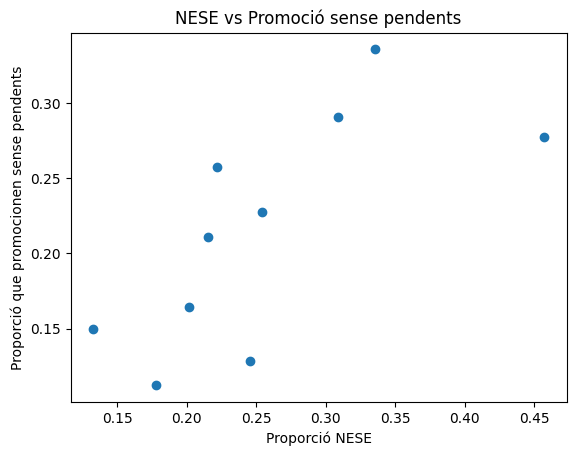

In [53]:
import matplotlib.pyplot as plt

merged = df_resultats_pivot.merge(df_necesitat_pivot, on="Codi districte")

plt.scatter(merged['prop_NESE'], merged['prop_pendents'])
plt.xlabel("Proporció NESE")
plt.ylabel("Proporció que promocionen sense pendents")
plt.title("NESE vs Promoció sense pendents")
plt.show()


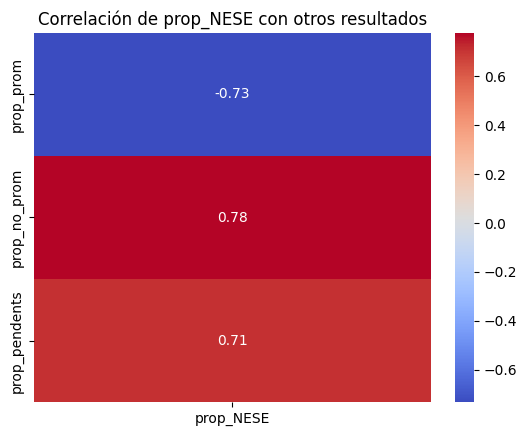

In [69]:
# Calculamos la correlación de prop_NESE con las demás columnas, excluyendo consigo misma
correlaciones = merged[['prop_NESE','prop_prom','prop_no_prom','prop_pendents']].corr()['prop_NESE'].drop('prop_NESE')

sns.heatmap(correlaciones.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlación de prop_NESE con otros resultados")
plt.show()



Distritos con más alumnos con necesidades educativas tienen más alumnos que no promocionan y mas alumnos que promocionan con pendientes y menos que promocionan sin pendientes  (+-1, altas correlaciones) 

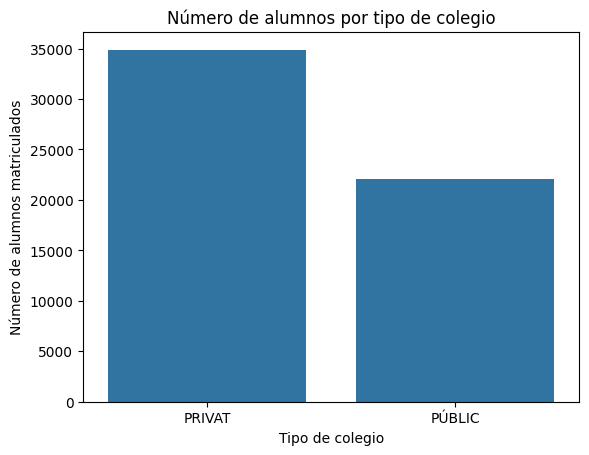

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por tipo de colegio y sumar alumnos matriculados
df_tipo = df_caracter.groupby("Naturalesa")["Alumnes matriculats"].sum().reset_index()

# Graficar usando barplot
sns.barplot(data=df_tipo, x="Naturalesa", y="Alumnes matriculats")
plt.title("Número de alumnos por tipo de colegio")
plt.ylabel("Número de alumnos matriculados")
plt.xlabel("Tipo de colegio")
plt.show()

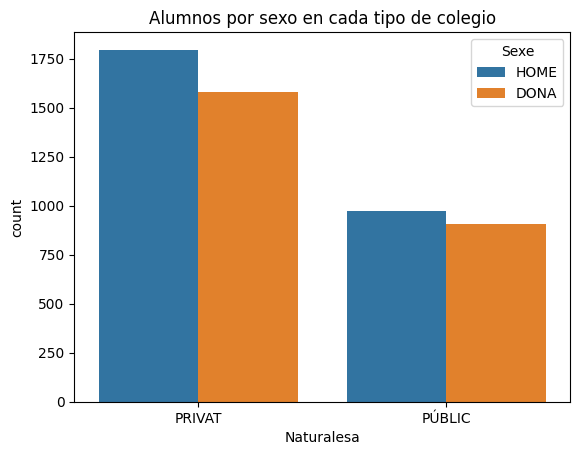

In [71]:
sns.countplot(data=df_caracter, x="Naturalesa", hue="Sexe")
plt.title("Alumnos por sexo en cada tipo de colegio")
plt.show()

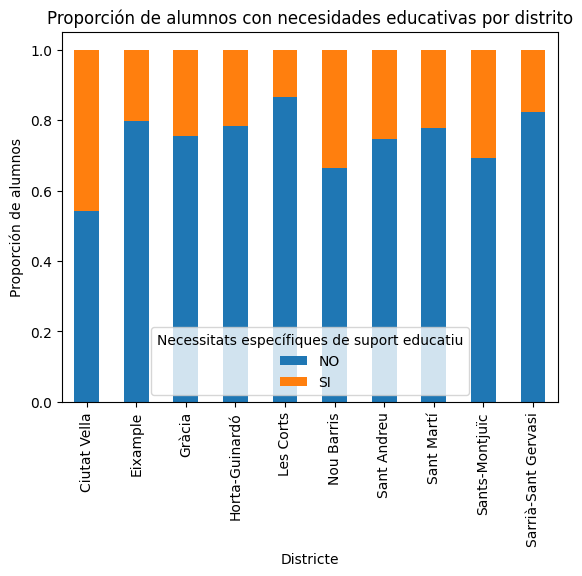

In [ ]:
# Agrupar y pivotar
df_necesitats_distrito = (
    df_caracter.groupby(["Districte", "Necessitats específiques de suport educatiu"])["Alumnes matriculats"]
    .sum()
    .unstack()
)

# Normalizar por distrito (filas) para que cada fila sume 1
df_necesitats_distrito_norm = df_necesitats_distrito.div(df_necesitats_distrito.sum(axis=1), axis=0)

# Graficar
df_necesitats_distrito_norm.plot(kind="bar", stacked=True)
plt.title("Proporción de alumnos con necesidades educativas por distrito")
plt.ylabel("Proporción de alumnos")
plt.show()



In [73]:
df_necesitats_distrito_norm

Necessitats específiques de suport educatiu,NO,SI
Districte,,
Ciutat Vella,0.542923,0.457077
Eixample,0.798097,0.201903
Gràcia,0.754644,0.245356
Horta-Guinardó,0.784451,0.215549
Les Corts,0.867218,0.132782
Nou Barris,0.664454,0.335546
Sant Andreu,0.745738,0.254262
Sant Martí,0.777792,0.222208
Sants-Montjuïc,0.691414,0.308586


## MAPA CANTIDAD DE EXTRANJEROS

In [79]:
df_barris_nac = (
    df_caracter.groupby(["Districte", "Zona nacionalitat (agrupació)","Necessitats específiques de suport educatiu"])["Alumnes matriculats"]
    .sum()
    .reset_index()
)

df_barris_nac.head()

,Districte,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats
0,Ciutat Vella,AMÈRICA DEL NORD,NO,4
1,Ciutat Vella,AMÈRICA DEL NORD,SI,5
2,Ciutat Vella,CENTRE I SUDAMÈRICA,NO,35
3,Ciutat Vella,CENTRE I SUDAMÈRICA,SI,96
4,Ciutat Vella,ESPANYA,NO,835


In [80]:
df = df_barris_nac.copy()

# Crear columna de nacionalidad (local extranjero)
df["Nacionality"] = df["Zona nacionalitat (agrupació)"].apply(lambda x: "Local" if x == "ESPANYA" else "Foreign")

# Agrupar por distrito y nacionalidad
df_grouped = df.groupby(["Districte", "Nacionality"])["Alumnes matriculats"].sum().unstack(fill_value=0).reset_index()

df_grouped 

Nacionality,Districte,Foreign,Local
0,Ciutat Vella,744,1411
1,Eixample,1173,6182
2,Gràcia,384,2738
3,Horta-Guinardó,775,5386
4,Les Corts,463,4372
5,Nou Barris,1248,4477
6,Sant Andreu,766,4807
7,Sant Martí,1198,6421
8,Sants-Montjuïc,959,3432
9,Sarrià-Sant Gervasi,720,9343


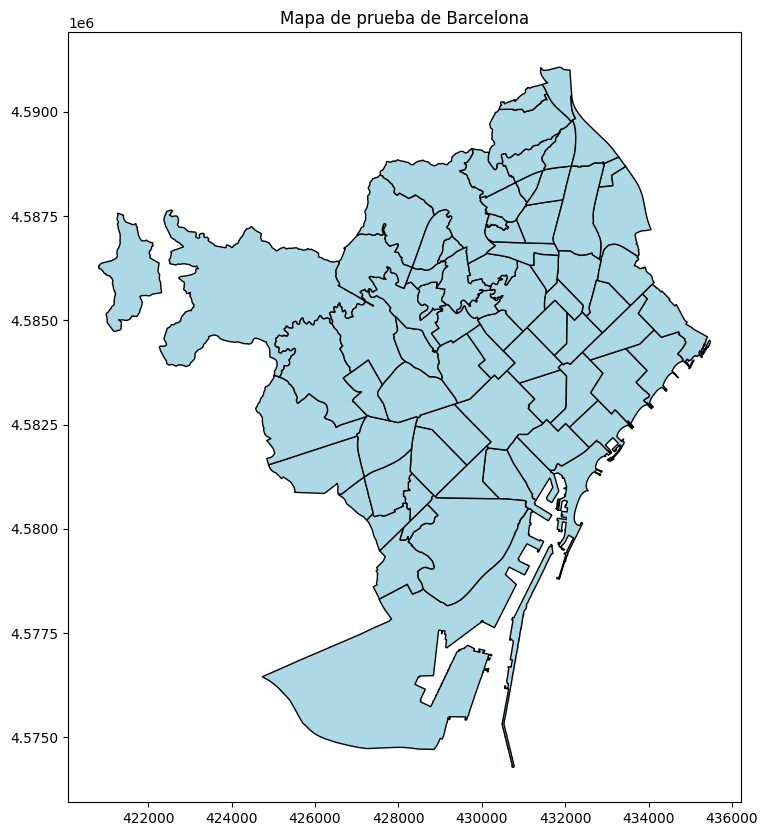

In [81]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# 1️⃣ Cargar GeoJSON
gdf_barris = gpd.read_file("barcelona_barris_clean.geojson")

# 2️⃣ Convertir la columna WKT a geometría
if isinstance(gdf_barris["geometria_etrs89"].iloc[0], str):
    gdf_barris["geometry"] = gdf_barris["geometria_etrs89"].apply(wkt.loads)

# 3️⃣ Indicarle a GeoPandas que esta columna es la geometría oficial
gdf_barris = gdf_barris.set_geometry("geometry")

# 4️⃣ Mantener solo geometrías válidas
gdf_barris = gdf_barris[gdf_barris["geometry"].notna()]
gdf_barris = gdf_barris[gdf_barris["geometry"].apply(lambda x: x.is_valid)]

# 5️⃣ Asignar CRS (si no lo tiene ya)
if gdf_barris.crs is None:
    gdf_barris = gdf_barris.set_crs(epsg=25831)  # ETRS89 / UTM 31N

fig, ax = plt.subplots(figsize=(10,10))

gdf_barris.plot(
    edgecolor="black",
    color="lightblue",
    ax=ax,
    aspect="equal"   # <<< evita el cálculo erróneo ANTES de plotear
)

plt.title("Mapa de prueba de Barcelona")
plt.show()




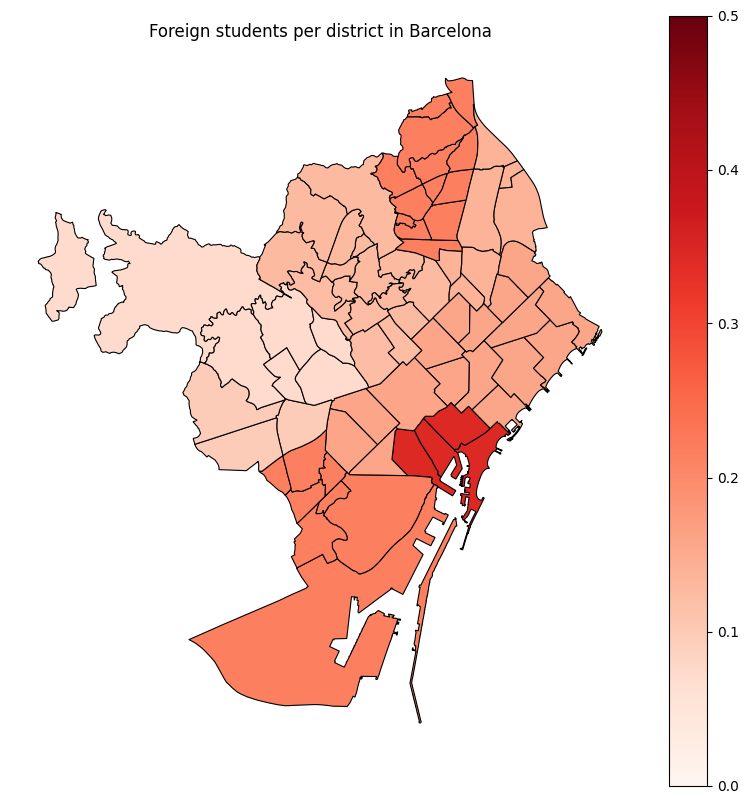

In [95]:
gdf_merged_foreign = gdf_barris.merge(df_grouped,left_on="nom_districte",right_on="Districte",how="left")

gdf_merged_foreign["Foreign"] = gdf_merged_foreign["Foreign"].fillna(0)
gdf_merged_foreign["Local"] = gdf_merged_foreign["Local"].fillna(0)

# Normalize
gdf_merged_foreign["Prop_Foreign"] = gdf_merged_foreign["Foreign"] / (gdf_merged_foreign["Foreign"] + gdf_merged_foreign["Local"])

fig, ax = plt.subplots(figsize=(10,10))

gdf_merged_foreign.plot(
    column="Prop_Foreign",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax,
    aspect="equal",
    vmin=0,    # valor mínimo de la escala
    vmax=0.5   # valor máximo de la escala
)
plt.title("Foreign students per district in Barcelona")
plt.axis("off")
plt.savefig("mapas/foreign_students_bcn.png", dpi=300, bbox_inches='tight')
plt.show()

In [96]:
print(gdf_merged_foreign[["Districte", "Local", "Foreign", "Prop_Foreign"]])


       Districte  Local  Foreign  Prop_Foreign
0   Ciutat Vella   1411      744      0.345244
1   Ciutat Vella   1411      744      0.345244
2   Ciutat Vella   1411      744      0.345244
3   Ciutat Vella   1411      744      0.345244
4       Eixample   6182     1173      0.159483
..           ...    ...      ...           ...
68    Sant Martí   6421     1198      0.157238
69    Sant Martí   6421     1198      0.157238
70    Sant Martí   6421     1198      0.157238
71    Sant Martí   6421     1198      0.157238
72    Sant Martí   6421     1198      0.157238

[73 rows x 4 columns]


## MAPA ALUMNONS CON NECESIDADES ESPECÍFICAS/ESPECIALES

In [84]:
df_necesitat_pivot

Necessitats específiques de suport educatiu,index,Districte,Codi districte,NO,SI,Total,prop_NESE
0,0,Ciutat Vella,801901,1170.0,985.0,2155.0,0.457077
1,1,Eixample,801902,5870.0,1485.0,7355.0,0.201903
2,2,Gràcia,801906,2356.0,766.0,3122.0,0.245356
3,3,Horta-Guinardó,801907,4833.0,1328.0,6161.0,0.215549
4,4,Les Corts,801904,4193.0,642.0,4835.0,0.132782
5,5,Nou Barris,801908,3804.0,1921.0,5725.0,0.335546
6,6,Sant Andreu,801909,4156.0,1417.0,5573.0,0.254262
7,7,Sant Martí,801910,5926.0,1693.0,7619.0,0.222208
8,8,Sants-Montjuïc,801903,3036.0,1355.0,4391.0,0.308586
9,9,Sarrià-Sant Gervasi,801905,8272.0,1791.0,10063.0,0.177979


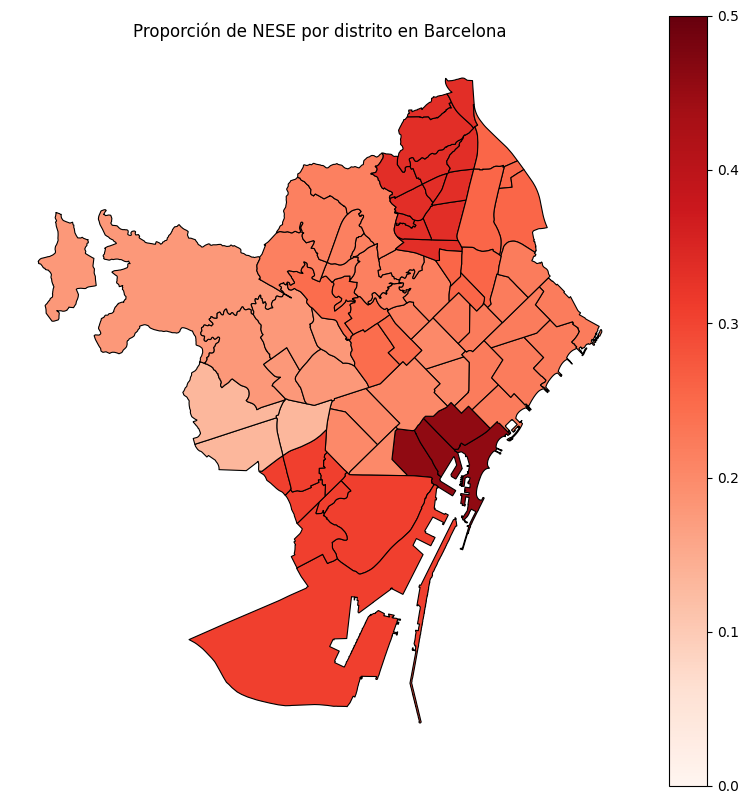

In [94]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# 1️⃣ Cargar GeoJSON
gdf_barris = gpd.read_file("barcelona_barris_clean.geojson")

# 2️⃣ Convertir la columna WKT a geometría
if isinstance(gdf_barris["geometria_etrs89"].iloc[0], str):
    gdf_barris["geometry"] = gdf_barris["geometria_etrs89"].apply(wkt.loads)

# 3️⃣ Indicarle a GeoPandas que esta columna es la geometría oficial
gdf_barris = gdf_barris.set_geometry("geometry")

# 4️⃣ Mantener solo geometrías válidas
gdf_barris = gdf_barris[gdf_barris["geometry"].notna()]
gdf_barris = gdf_barris[gdf_barris["geometry"].apply(lambda x: x.is_valid)]

# 5️⃣ Asignar CRS (si no lo tiene ya)
if gdf_barris.crs is None:
    gdf_barris = gdf_barris.set_crs(epsg=25831)  # ETRS89 / UTM 31N

# 6️⃣ Hacer merge con tu df que contiene prop_NESE
gdf_merged_nese = gdf_barris.merge(df_necesitat_pivot, left_on="nom_districte", right_on="Districte", how="left")

# 7️⃣ Rellenar NaNs si es necesario
gdf_merged_nese["prop_NESE"] = gdf_merged_nese["prop_NESE"].fillna(0)

fig, ax = plt.subplots(figsize=(10,10))

gdf_merged_nese.plot(
    column="prop_NESE",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax,
    aspect="equal",
    vmin=0,    # valor mínimo de la escala
    vmax=0.5   # valor máximo de la escala
)

plt.title("Proporción de NESE por distrito en Barcelona")
plt.savefig("mapas/prop_NESE_bcn.png", dpi=300, bbox_inches='tight')
plt.axis("off")
plt.show()


# Correlacion alumnos nuevos (extranjeros) / Necesidades ?

In [102]:
# Agrupar por distrito y calcular la media de la proporción
df_foreign_districte = gdf_merged_foreign.groupby('Districte', as_index=False)['Prop_Foreign'].mean()
df_nese_districte = gdf_merged_nese.groupby('Districte', as_index=False)['prop_NESE'].mean()

# Hacer merge para compararlos
df_compare = df_nese_districte.merge(df_foreign_districte, on='Districte', how='inner')

print(df_compare)


             Districte  prop_NESE  Prop_Foreign
0         Ciutat Vella   0.457077      0.345244
1             Eixample   0.201903      0.159483
2               Gràcia   0.245356      0.122998
3       Horta-Guinardó   0.215549      0.125791
4            Les Corts   0.132782      0.095760
5           Nou Barris   0.335546      0.217991
6          Sant Andreu   0.254262      0.137448
7           Sant Martí   0.222208      0.157238
8       Sants-Montjuïc   0.308586      0.218401
9  Sarrià-Sant Gervasi   0.177979      0.071549


In [105]:
corr = df_compare[['prop_NESE', 'Prop_Foreign']].corr()
print(corr)


              prop_NESE  Prop_Foreign
prop_NESE      1.000000      0.943971
Prop_Foreign   0.943971      1.000000


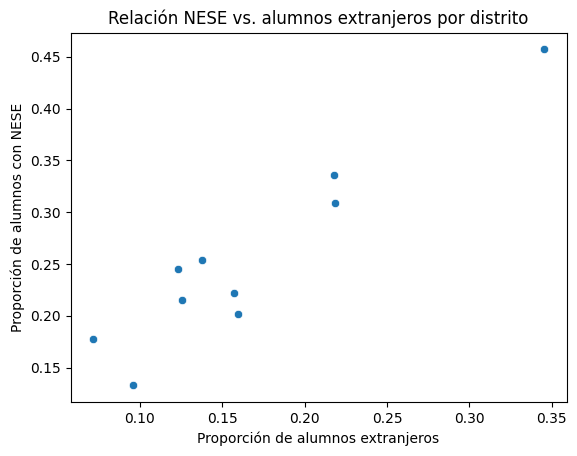

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_compare, x='Prop_Foreign', y='prop_NESE')
plt.xlabel("Proporción de alumnos extranjeros")
plt.ylabel("Proporción de alumnos con NESE")
plt.title("Relación NESE vs. alumnos extranjeros por distrito")
plt.show()


Existe correlacion, muchas de las necesidades son que son nuevos entonces probablemente sean extranjeros

Obtengo del df_especifiques por distrito - NO PUEDO - ABORTAMOS MISIÓN 
 - Estudiar % extranjeros,% NESE (sin tipo concreto) y ver si ay mas extranjeros con eso( no me convence) - he podido 
 - Mirarlo en cataluña en general

## Privado/Público y NESE

In [107]:
df_caracter

,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats,Districte
0,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,CENTRE I SUDAMÈRICA,SI,1,Ciutat Vella
1,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,NO,1,Ciutat Vella
2,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,SI,1,Ciutat Vella
3,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,MAGREB,SI,1,Ciutat Vella
4,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ÀSIA I OCEANIA,SI,1,Ciutat Vella
...,...,...,...,...,...,...,...,...,...,...,...
5250,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,CENTRE I SUDAMÈRICA,SI,1,Sant Martí
5251,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,NO,3,Sant Martí
5252,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,SI,6,Sant Martí
5253,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,MAGREB,NO,1,Sant Martí


In [122]:
df_necesitat.head()

,Districte,Codi districte,Naturalesa,Necessitats específiques de suport educatiu,alumnes
0,Ciutat Vella,801901,PRIVAT,NO,565
1,Ciutat Vella,801901,PRIVAT,SI,397
2,Ciutat Vella,801901,PÚBLIC,NO,605
3,Ciutat Vella,801901,PÚBLIC,SI,588
4,Eixample,801902,PRIVAT,NO,4149


In [140]:
df_summary = df_necesitat.groupby(
    ['Naturalesa', 'Necessitats específiques de suport educatiu',"Sexe"]
)['alumnes'].sum().reset_index()
df_summary.head()

,Naturalesa,Necessitats específiques de suport educatiu,Sexe,alumnes
0,PRIVAT,NO,DONA,14207
1,PRIVAT,NO,HOME,13739
2,PRIVAT,SI,DONA,2919
3,PRIVAT,SI,HOME,4020
4,PÚBLIC,NO,DONA,7741


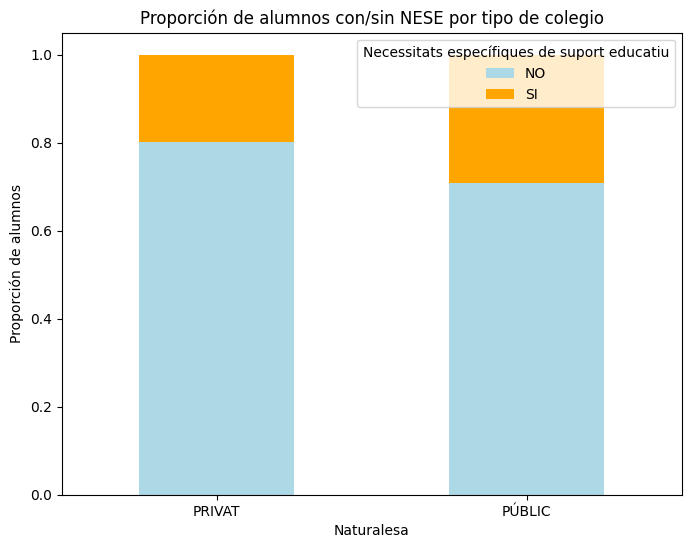

In [135]:
df_pivot_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot_norm.plot(
    kind='bar',
    stacked=True,
    color=['lightblue', 'orange'],
    figsize=(8,6)
)
plt.ylabel("Proporción de alumnos")
plt.title("Proporción de alumnos con/sin NESE por tipo de colegio")
plt.xticks(rotation=0)
plt.show()



# Genero/ NESE

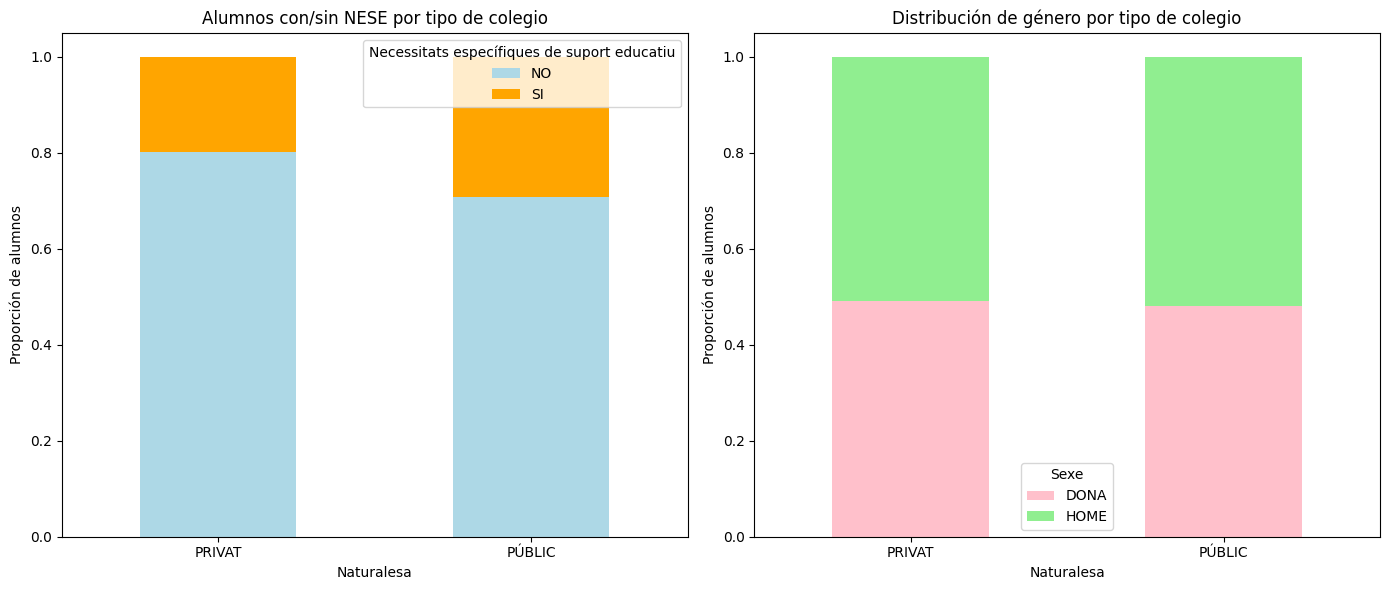

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo df_summary tiene columnas:
# 'Naturalesa' (tipo de colegio), 'Necessitats específiques de suport educatiu' (Sí/No), 'Sexe', 'alumnes'

# 1️⃣ Pivot para NESE
df_pivot_nese = df_summary.pivot_table(
    index='Naturalesa', 
    columns='Necessitats específiques de suport educatiu', 
    values='alumnes', 
    aggfunc='sum'
)
df_pivot_nese_norm = df_pivot_nese.div(df_pivot_nese.sum(axis=1), axis=0)

# 2️⃣ Pivot para Sexo
df_pivot_sexe = df_summary.pivot_table(
    index='Naturalesa', 
    columns='Sexe', 
    values='alumnes', 
    aggfunc='sum'
)
df_pivot_sexe_norm = df_pivot_sexe.div(df_pivot_sexe.sum(axis=1), axis=0)

# 3️⃣ Crear panel con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# NESE plot
df_pivot_nese_norm.plot(
    kind='bar', 
    stacked=True, 
    color=['lightblue', 'orange'], 
    ax=axes[0]
)
axes[0].set_ylabel("Proporción de alumnos")
axes[0].set_title("Alumnos con/sin NESE por tipo de colegio")
axes[0].set_xticklabels(df_pivot_nese_norm.index, rotation=0)

# Sexo plot
df_pivot_sexe_norm.plot(
    kind='bar', 
    stacked=True, 
    color=['pink', 'lightgreen'], 
    ax=axes[1]
)
axes[1].set_ylabel("Proporción de alumnos")
axes[1].set_title("Distribución de género por tipo de colegio")
axes[1].set_xticklabels(df_pivot_sexe_norm.index, rotation=0)

plt.tight_layout()
plt.show()


# Necesidades específicas / clasificacion

C:\Users\PC\AppData\Local\Temp\ipykernel_18784\1790172235.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




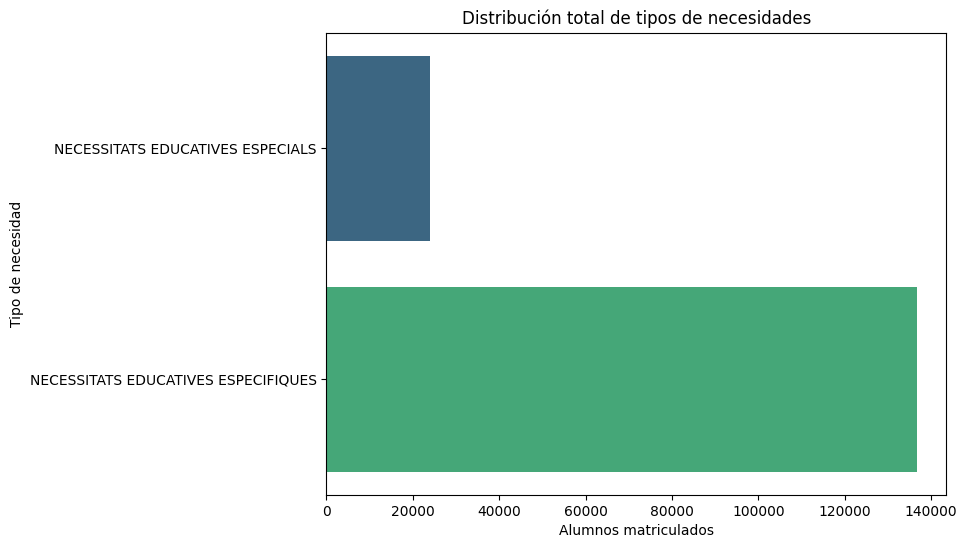

In [150]:
import seaborn as sns

# Combinar todos los df en uno solo para contar categorías
df_todas = pd.concat([
    df_especifiques, df_especials, df_mental, df_educatives, df_intel, df_fisics
])

# Agrupar por categoría
df_necesidades = df_todas.groupby('NESE agrupació')['Alumnes matriculats'].sum().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=df_necesidades, x='Alumnes matriculats', y='NESE agrupació', palette='viridis')
plt.title('Distribución total de tipos de necesidades')
plt.xlabel('Alumnos matriculados')
plt.ylabel('Tipo de necesidad')
plt.show()


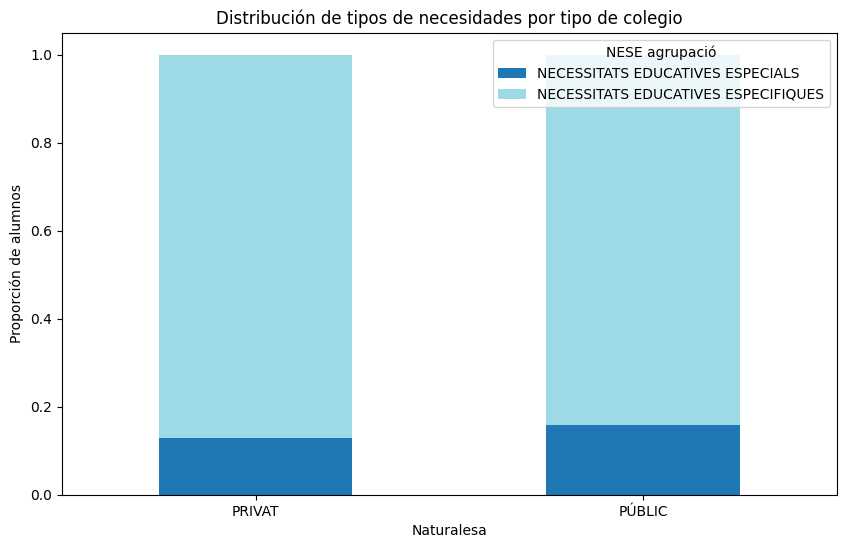

In [151]:
df_colegios = df_todas.groupby(['Naturalesa', 'NESE agrupació'])['Alumnes matriculats'].sum().unstack(fill_value=0)

# Normalizar para proporciones
df_colegios_norm = df_colegios.div(df_colegios.sum(axis=1), axis=0)

df_colegios_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)
plt.title('Distribución de tipos de necesidades por tipo de colegio')
plt.ylabel('Proporción de alumnos')
plt.xticks(rotation=0)
plt.show()


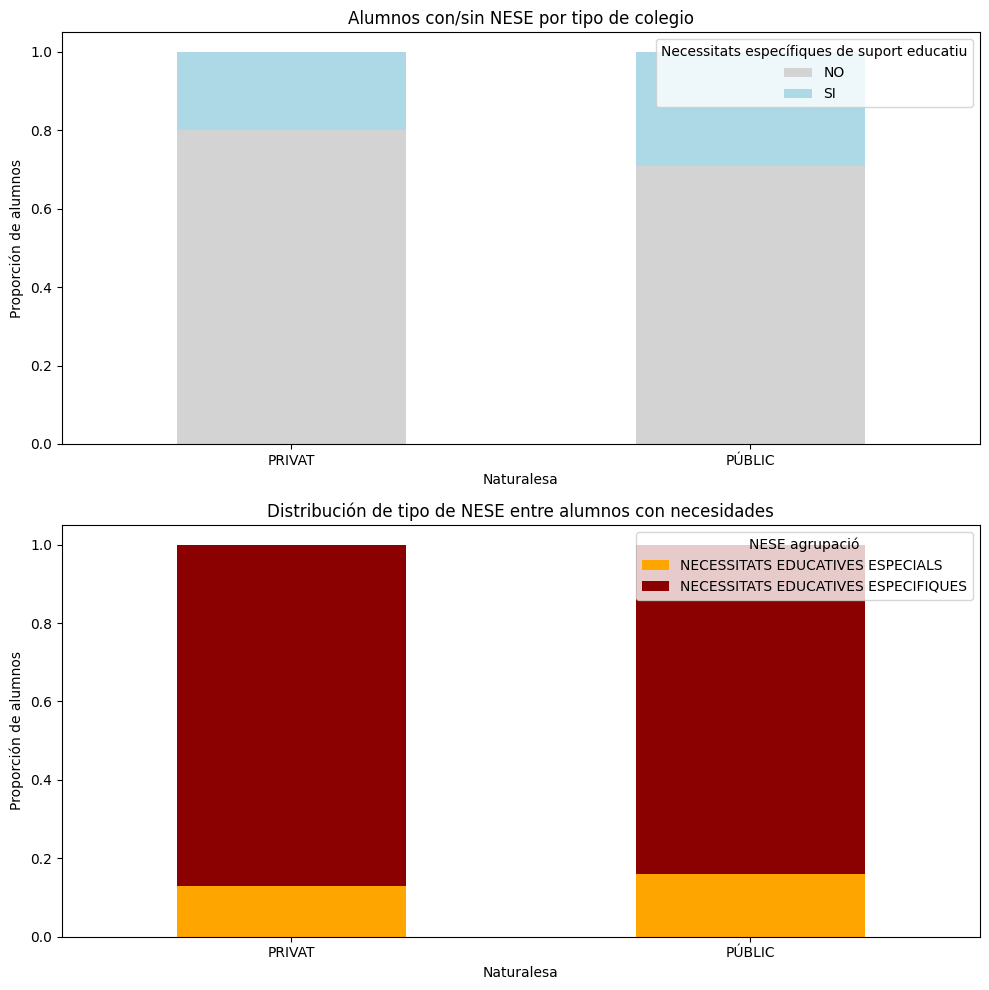

In [155]:
# Contar alumnos por tipo de colegio y tipo de NESE
df_tipo = pd.concat([df_especifiques, df_especials])
df_tipo_summary = df_tipo.groupby(['Naturalesa', 'NESE agrupació'])['Alumnes matriculats'].sum().reset_index()
df_tipo_pivot = df_tipo_summary.pivot_table(
    index='Naturalesa',
    columns='NESE agrupació',  # Específicas / Especials
    values='Alumnes matriculats',
    aggfunc='sum',
    fill_value=0
)
df_tipo_pivot_norm = df_tipo_pivot.div(df_tipo_pivot.sum(axis=1), axis=0)

# Panel con los dos gráficos
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# 1️⃣ Con/sin NESE (df_pivot_nese_general_norm)
df_pivot_nese_general_norm.plot(
    kind='bar',
    stacked=True,
    color=['lightgray', 'lightblue'],
    ax=axes[0]
)
axes[0].set_ylabel("Proporción de alumnos")
axes[0].set_title("Alumnos con/sin NESE por tipo de colegio")
axes[0].set_xticklabels(df_pivot_nese_general_norm.index, rotation=0)

# 2️⃣ Tipo de NESE (df_tipo_pivot_norm)
df_tipo_pivot_norm.plot(
    kind='bar',
    stacked=True,
    color=['orange', 'darkred'],
    ax=axes[1]
)
axes[1].set_ylabel("Proporción de alumnos")
axes[1].set_title("Distribución de tipo de NESE entre alumnos con necesidades")
axes[1].set_xticklabels(df_tipo_pivot_norm.index, rotation=0)

plt.tight_layout()
plt.show()


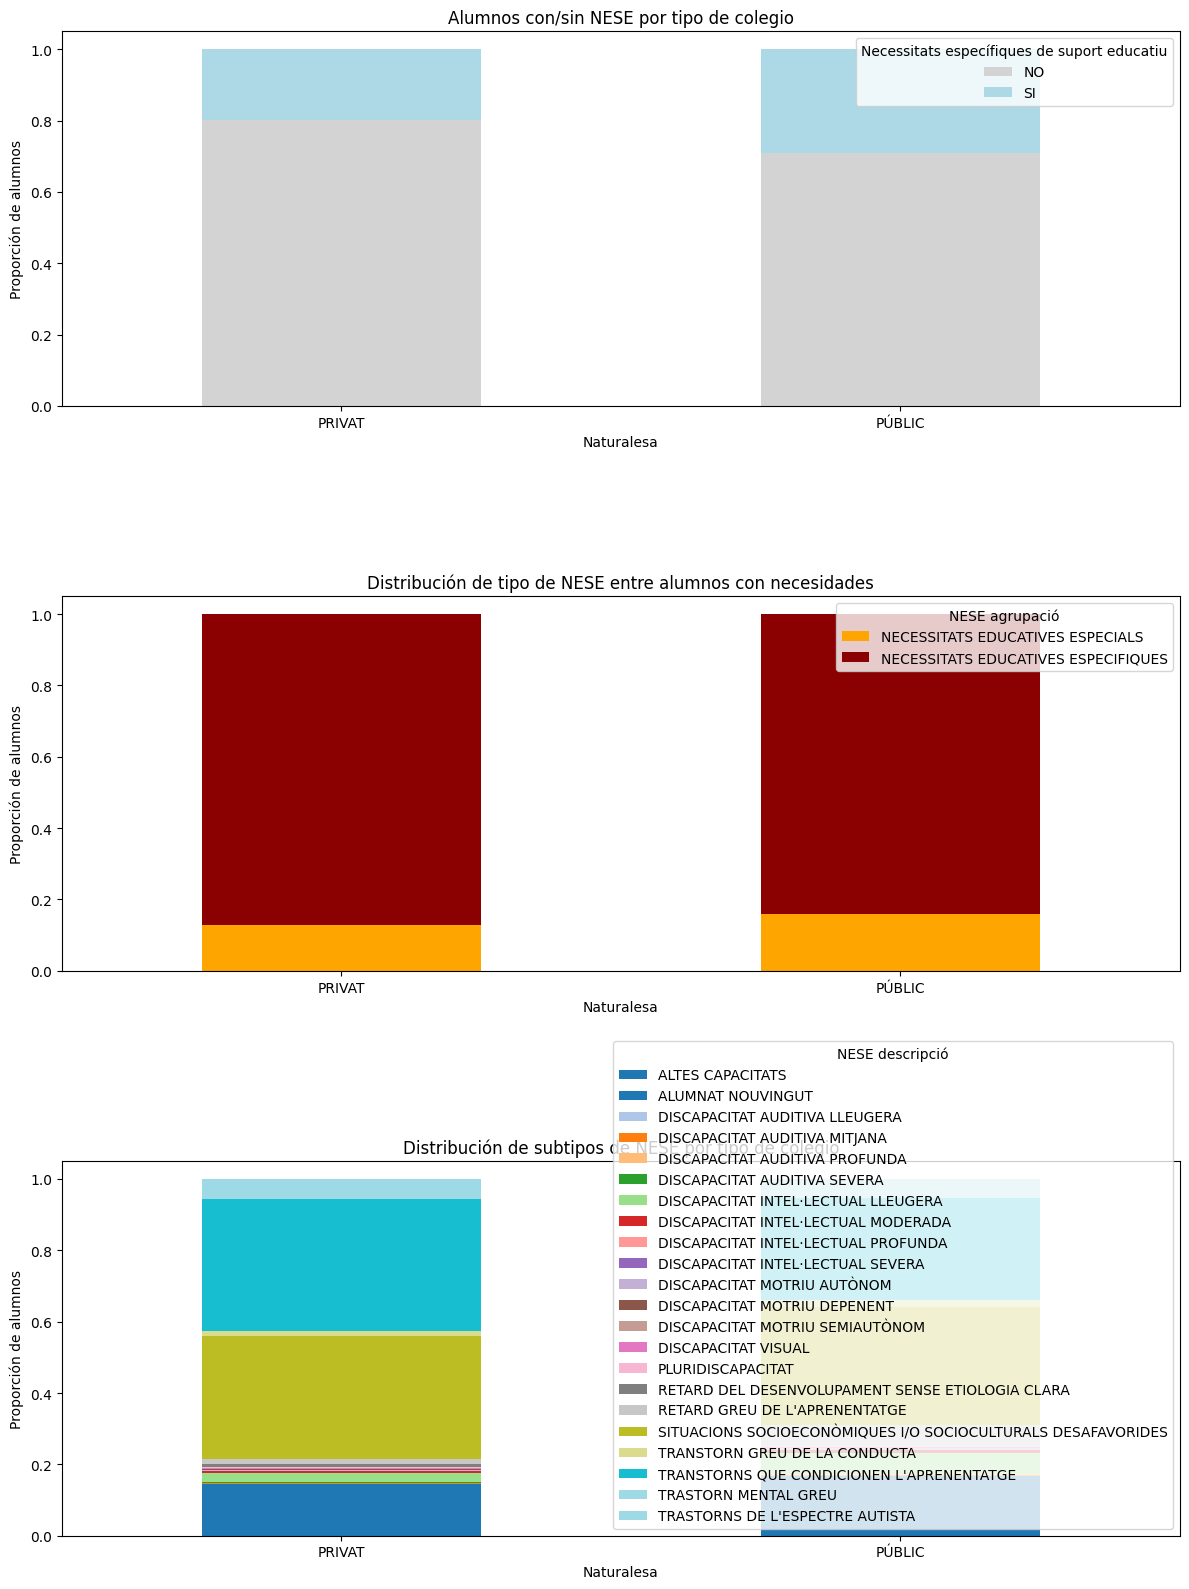

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# 1️⃣ Alumnos con/sin NESE
# --------------------------
df_nese_general = df_summary.groupby(['Naturalesa', 'Necessitats específiques de suport educatiu'])['alumnes'].sum().reset_index()
df_pivot_nese_general = df_nese_general.pivot_table(
    index='Naturalesa',
    columns='Necessitats específiques de suport educatiu',
    values='alumnes',
    aggfunc='sum',
    fill_value=0
)
df_pivot_nese_general_norm = df_pivot_nese_general.div(df_pivot_nese_general.sum(axis=1), axis=0)

# --------------------------
# 2️⃣ Distribución entre Específicas y Especials (solo los que tienen NESE)
# --------------------------
df_with_nese = pd.concat([df_especifiques, df_especials])
df_tipo_summary = df_with_nese.groupby(['Naturalesa', 'NESE agrupació'])['Alumnes matriculats'].sum().reset_index()
df_tipo_pivot = df_tipo_summary.pivot_table(
    index='Naturalesa',
    columns='NESE agrupació',
    values='Alumnes matriculats',
    aggfunc='sum',
    fill_value=0
)
df_tipo_pivot_norm = df_tipo_pivot.div(df_tipo_pivot.sum(axis=1), axis=0)

# --------------------------
# 3️⃣ Distribución por subtipos (opcional)
# --------------------------
df_subtipos_summary = df_with_nese.groupby(['Naturalesa', 'NESE descripció'])['Alumnes matriculats'].sum().reset_index()
df_subtipos_pivot = df_subtipos_summary.pivot_table(
    index='Naturalesa',
    columns='NESE descripció',
    values='Alumnes matriculats',
    aggfunc='sum',
    fill_value=0
)
df_subtipos_pivot_norm = df_subtipos_pivot.div(df_subtipos_pivot.sum(axis=1), axis=0)

# --------------------------
# 4️⃣ Crear panel de 3 gráficos
# --------------------------
fig, axes = plt.subplots(3, 1, figsize=(12,16))

# a) Con/sin NESE
df_pivot_nese_general_norm.plot(
    kind='bar',
    stacked=True,
    color=['lightgray', 'lightblue'],
    ax=axes[0]
)
axes[0].set_ylabel("Proporción de alumnos")
axes[0].set_title("Alumnos con/sin NESE por tipo de colegio")
axes[0].set_xticklabels(df_pivot_nese_general_norm.index, rotation=0)

# b) Específicas vs Especials
df_tipo_pivot_norm.plot(
    kind='bar',
    stacked=True,
    color=['orange', 'darkred'],
    ax=axes[1]
)
axes[1].set_ylabel("Proporción de alumnos")
axes[1].set_title("Distribución de tipo de NESE entre alumnos con necesidades")
axes[1].set_xticklabels(df_tipo_pivot_norm.index, rotation=0)

# c) Subtipos
df_subtipos_pivot_norm.plot(
    kind='bar',
    stacked=True,
    ax=axes[2],
    colormap='tab20'
)
axes[2].set_ylabel("Proporción de alumnos")
axes[2].set_title("Distribución de subtipos de NESE por tipo de colegio")
axes[2].set_xticklabels(df_subtipos_pivot_norm.index, rotation=0)

plt.tight_layout()
plt.show()


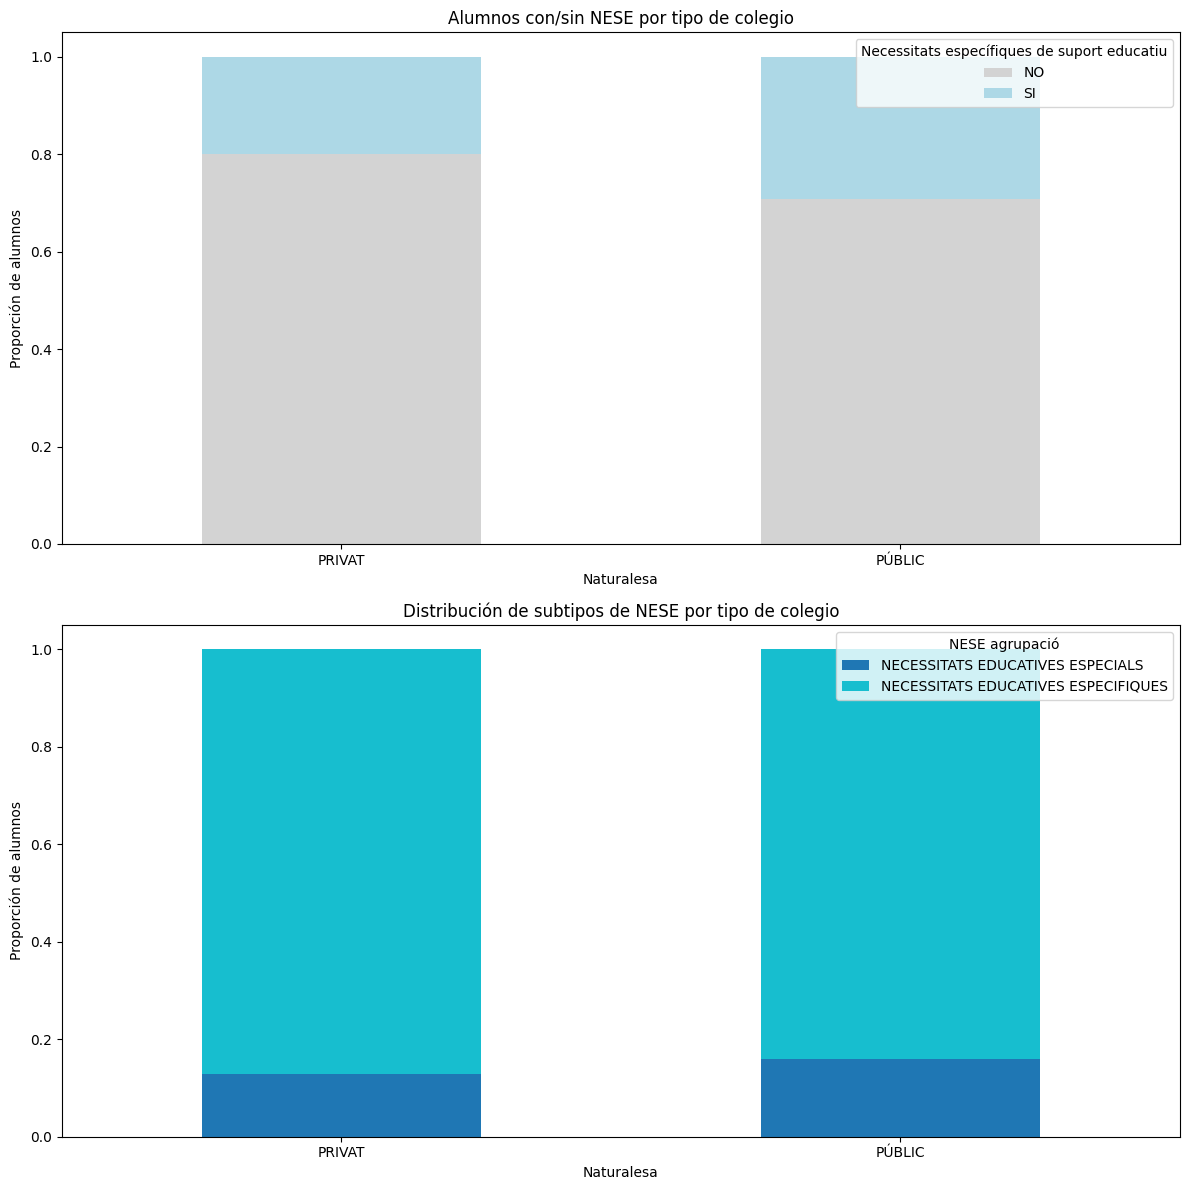

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# 1️⃣ Proporción de alumnos con/sin NESE
# --------------------------
df_nese_general = df_summary.groupby(['Naturalesa', 'Necessitats específiques de suport educatiu'])['alumnes'].sum().reset_index()
df_pivot_nese_general = df_nese_general.pivot_table(
    index='Naturalesa',
    columns='Necessitats específiques de suport educatiu',
    values='alumnes',
    aggfunc='sum',
    fill_value=0
)
df_pivot_nese_general_norm = df_pivot_nese_general.div(df_pivot_nese_general.sum(axis=1), axis=0)

# --------------------------
# 2️⃣ Distribución por subtipos (mental, intelectual, educativa, física)
# --------------------------
df_subtipos = pd.concat([df_mental, df_intel, df_educatives, df_fisics])
df_subtipos_summary = df_subtipos.groupby(['Naturalesa', 'NESE agrupació'])['Alumnes matriculats'].sum().reset_index()
df_subtipos_pivot = df_subtipos_summary.pivot_table(
    index='Naturalesa',
    columns='NESE agrupació',  # mental, intelectual, educativa, física
    values='Alumnes matriculats',
    aggfunc='sum',
    fill_value=0
)
df_subtipos_pivot_norm = df_subtipos_pivot.div(df_subtipos_pivot.sum(axis=1), axis=0)

# --------------------------
# 3️⃣ Panel de 2 gráficos
# --------------------------
fig, axes = plt.subplots(2, 1, figsize=(12,12))

# a) Con/sin NESE
df_pivot_nese_general_norm.plot(
    kind='bar',
    stacked=True,
    color=['lightgray', 'lightblue'],
    ax=axes[0]
)
axes[0].set_ylabel("Proporción de alumnos")
axes[0].set_title("Alumnos con/sin NESE por tipo de colegio")
axes[0].set_xticklabels(df_pivot_nese_general_norm.index, rotation=0)

# b) Subtipos
df_subtipos_pivot_norm.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],
    colormap='tab10'
)
axes[1].set_ylabel("Proporción de alumnos")
axes[1].set_title("Distribución de subtipos de NESE por tipo de colegio")
axes[1].set_xticklabels(df_subtipos_pivot_norm.index, rotation=0)

plt.tight_layout()
plt.show()


## Gráfico distribucion personas por tipo de necesidad

In [162]:
total_especifiques = df_especifiques["Alumnes matriculats"].sum()
total_especials = df_especials["Alumnes matriculats"].sum()
total_necesitats = total_especifiques + total_especials 
total_necesitats

80362